In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('./mydata/Met_Data_OS.csv')
df1.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,11/07/2023 13:00,0,0.4,0,16.5,0,14.2,12.3,14.3,76,...,2,9,2,310,25,82,0.4,35000,30,7
1,11/07/2023 14:00,0,0.0,0,18.4,0,13.9,9.9,12.3,58,...,2,8,2,290,2,11,0.3,35000,40,7
2,11/07/2023 15:00,0,0.0,0,18.7,0,14.2,10.3,12.6,58,...,2,15,2,290,1,82,0.5,35000,90,6
3,11/07/2023 16:00,0,0.0,0,18.2,0,13.8,9.9,12.3,59,...,2,13,2,290,2,11,0.6,40000,30,7
4,11/07/2023 17:00,0,0.0,0,18.0,0,13.7,10.0,12.2,59,...,2,13,2,280,2,11,0.7,40000,40,5


In [3]:
df1.drop(['ind','ind.1','ind.2','ind.3'], axis=1, inplace=True)
df1.head()

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,11/07/2023 13:00,0.4,16.5,14.2,12.3,14.3,76,1008.9,9,2,310,25,82,0.4,35000,30,7
1,11/07/2023 14:00,0.0,18.4,13.9,9.9,12.3,58,1008.7,8,2,290,2,11,0.3,35000,40,7
2,11/07/2023 15:00,0.0,18.7,14.2,10.3,12.6,58,1009.1,15,2,290,1,82,0.5,35000,90,6
3,11/07/2023 16:00,0.0,18.2,13.8,9.9,12.3,59,1009.3,13,2,290,2,11,0.6,40000,30,7
4,11/07/2023 17:00,0.0,18.0,13.7,10.0,12.2,59,1009.3,13,2,280,2,11,0.7,40000,40,5


In [4]:
df2=pd.read_csv('./mydata/St_Patricks_2min_FullDataSet.csv')
df2.head()

,Timestamp,NO2
0,2023-07-27 11:52:54,4.55
1,2023-07-27 11:54:54,4.40
2,2023-07-27 11:56:54,3.96
3,2023-07-27 11:58:54,7.23
4,2023-07-27 12:00:54,4.30


In [5]:
df2.shape

(244109, 2)

In [6]:
df1['date']=pd.to_datetime(df1['date'], format='%d/%m/%Y %H:%M')
df2['Timestamp']=pd.to_datetime(df2['Timestamp'])
# in format does pd.to_datetime() produce its output?

In [7]:
df2.head()

,Timestamp,NO2
0,2023-07-27 11:52:54,4.55
1,2023-07-27 11:54:54,4.40
2,2023-07-27 11:56:54,3.96
3,2023-07-27 11:58:54,7.23
4,2023-07-27 12:00:54,4.30


In [8]:
df2.shape

(244109, 2)

In [9]:
df2.set_index('Timestamp', inplace=True)
df2_hourly=df2.resample('1H').mean()
df2_monthly=df2.resample('M').mean()
df2_monthly.head()

,NO2
Timestamp,
2023-07-31,11.267824
2023-08-31,11.629680
2023-09-30,14.773859
2023-10-31,17.400990
2023-11-30,17.967655


In [10]:
df2_hourly=df2_hourly.reset_index()
df2_hourly.head()


,Timestamp,NO2
0,2023-07-27 11:00:00,5.035000
1,2023-07-27 12:00:00,5.360333
2,2023-07-27 13:00:00,5.173000
3,2023-07-27 14:00:00,5.743333
4,2023-07-27 15:00:00,5.773667


In [11]:
df_merged1=pd.merge(df1,df2_hourly,left_on='date',right_on='Timestamp',how='right')

In [12]:
df_merged1.drop('Timestamp',axis=1,inplace=True)

In [13]:
df_merged1.rename(columns={'NO2':'NO2_St_Patricks'},inplace=True)

In [14]:
df_merged1.head()

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,NO2_St_Patricks
0,2023-07-27 11:00:00,0.0,19.3,16.8,15.1,17.1,77.0,1003.1,6.0,2.0,260.0,2.0,11.0,0.3,50000.0,28.0,7.0,5.035000
1,2023-07-27 12:00:00,0.0,20.7,17.8,15.9,18.1,74.0,1002.9,6.0,2.0,240.0,2.0,11.0,0.9,50000.0,18.0,7.0,5.360333
2,2023-07-27 13:00:00,0.0,21.3,17.3,14.5,16.5,65.0,1002.8,6.0,2.0,230.0,2.0,11.0,0.9,50000.0,22.0,6.0,5.173000
3,2023-07-27 14:00:00,0.0,22.4,16.9,12.9,14.8,55.0,1002.8,8.0,2.0,240.0,2.0,11.0,1.0,50000.0,23.0,5.0,5.743333
4,2023-07-27 15:00:00,0.0,22.3,17.6,14.4,16.4,61.0,1002.6,7.0,2.0,240.0,2.0,11.0,0.7,50000.0,24.0,5.0,5.773667


In [15]:
df3=pd.read_csv('./mydata/Grand_Parade_FullDataSet.csv')
df3.head()

,Timestamp,NO2
0,2023-07-11 13:41:50,4.42
1,2023-07-11 13:43:50,4.59
2,2023-07-11 13:45:50,6.45
3,2023-07-11 13:47:50,4.67
4,2023-07-11 13:49:50,9.43


In [16]:
df3['Timestamp']=pd.to_datetime(df3['Timestamp'])

In [17]:
df3.shape

(214948, 2)

In [18]:
df3.head()

,Timestamp,NO2
0,2023-07-11 13:41:50,4.42
1,2023-07-11 13:43:50,4.59
2,2023-07-11 13:45:50,6.45
3,2023-07-11 13:47:50,4.67
4,2023-07-11 13:49:50,9.43


In [19]:
df3.set_index('Timestamp', inplace=True)
df3_hourly=df3.resample('1H').mean()
df3_hourly=df3_hourly.reset_index()
df3_monthly=df3.resample('M').mean()
df3_monthly.head()

,NO2
Timestamp,
2023-07-31,8.096723
2023-08-31,9.288866
2023-09-30,11.475091
2023-10-31,12.298395
2023-11-30,10.160957


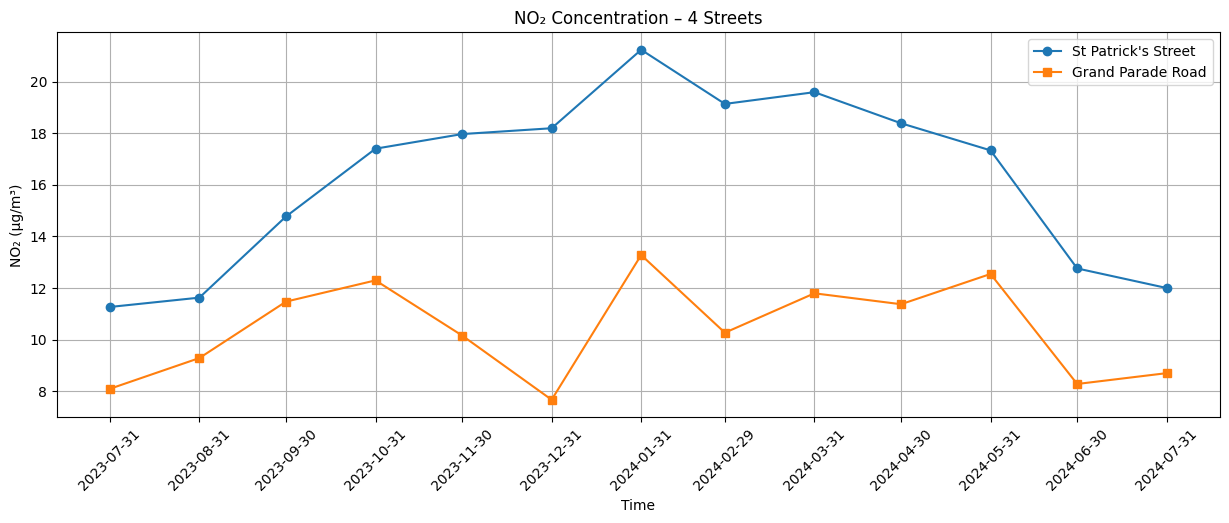

In [20]:
plt.figure(figsize=(15,5))
plt.plot(df2_monthly.index,df2_monthly['NO2'], label='St Patrick\'s Street', marker='o')
plt.plot(df3_monthly.index,df3_monthly['NO2'], label='Grand Parade Road', marker='s')


xticks = df2_monthly.index[::1]
plt.xticks(xticks, rotation=45)


plt.title("NO₂ Concentration – 4 Streets")
plt.xlabel("Time")
plt.ylabel("NO₂ (µg/m³)")
plt.legend()
plt.grid(True)

In [21]:
df4=pd.read_csv('./mydata/Beasley_Street_FullDataSet.csv')
df4.head()

,Timestamp,NO2
0,2023-08-06 18:16:55,10.14
1,2023-08-06 18:18:55,13.29
2,2023-08-06 18:20:55,11.41
3,2023-08-06 18:22:55,12.22
4,2023-08-06 18:24:55,13.61


In [22]:
df4['Timestamp']=pd.to_datetime(df4['Timestamp'])
df4.set_index('Timestamp', inplace=True)

df4_hourly=df4.resample('1H').mean()
df4_hourly=df4_hourly.reset_index()
df4_monthly=df4.resample('M').mean()
# df4_monthly=df4_monthly.reset_index()
df4_monthly.head()

,NO2
Timestamp,
2023-08-31,10.684178
2023-09-30,12.762144
2023-10-31,15.301730
2023-11-30,16.670836
2023-12-31,15.868563


In [23]:
df5=pd.read_csv('./mydata/Oliver_Plunkett_FullDataSet.csv')
df5.head()

,Timestamp,NO2
0,2023-08-06 16:17:10,4.14
1,2023-08-06 16:19:10,4.65
2,2023-08-06 16:21:10,4.98
3,2023-08-06 16:23:10,4.93
4,2023-08-06 16:25:10,4.75


In [24]:
df5['Timestamp']=pd.to_datetime(df5['Timestamp'])
df5.set_index('Timestamp', inplace=True)
df5_monthly=df5.resample('M').mean()
df5_hourly=df5.resample('1H').mean()
df5_hourly=df5_hourly.reset_index()
# df4_monthly=df4_monthly.reset_index()
df5_monthly.head()

,NO2
Timestamp,
2023-08-31,10.727020
2023-09-30,12.916423
2023-10-31,15.883041
2023-11-30,17.564833
2023-12-31,17.395557


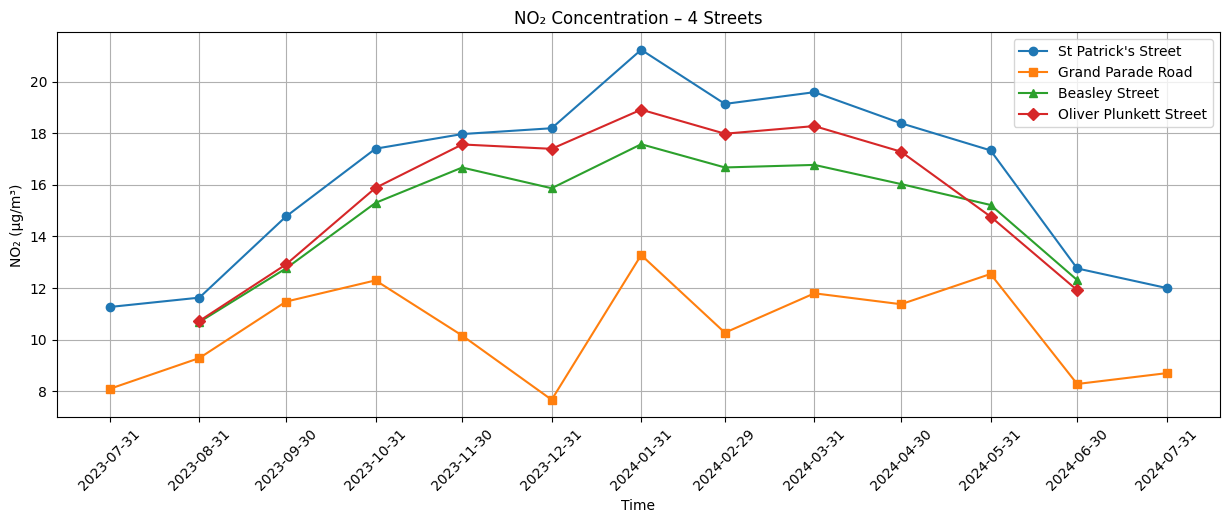

In [25]:
plt.figure(figsize=(15,5))
plt.plot(df2_monthly.index,df2_monthly['NO2'], label='St Patrick\'s Street', marker='o')
plt.plot(df3_monthly.index,df3_monthly['NO2'], label='Grand Parade Road', marker='s')
plt.plot(df4_monthly.index,df4_monthly['NO2'], label='Beasley Street', marker='^')
plt.plot(df5_monthly.index,df5_monthly['NO2'], label='Oliver Plunkett Street', marker='D')


xticks = df2_monthly.index[::1]
plt.xticks(xticks, rotation=45)


plt.title("NO₂ Concentration – 4 Streets")
plt.xlabel("Time")
plt.ylabel("NO₂ (µg/m³)")
plt.legend()
plt.grid(True)

In [26]:
df_merged2=pd.merge(df_merged1,df3_hourly, left_on='date',right_on='Timestamp',how='left')
df_merged2.drop('Timestamp',axis=1,inplace=True)
df_merged2.rename(columns={'NO2':'NO2_Grand_Parade'},inplace=True)
df_merged2.head()

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,NO2_St_Patricks,NO2_Grand_Parade
0,2023-07-27 11:00:00,0.0,19.3,16.8,15.1,17.1,77.0,1003.1,6.0,2.0,260.0,2.0,11.0,0.3,50000.0,28.0,7.0,5.035000,4.151000
1,2023-07-27 12:00:00,0.0,20.7,17.8,15.9,18.1,74.0,1002.9,6.0,2.0,240.0,2.0,11.0,0.9,50000.0,18.0,7.0,5.360333,4.458667
2,2023-07-27 13:00:00,0.0,21.3,17.3,14.5,16.5,65.0,1002.8,6.0,2.0,230.0,2.0,11.0,0.9,50000.0,22.0,6.0,5.173000,3.627667
3,2023-07-27 14:00:00,0.0,22.4,16.9,12.9,14.8,55.0,1002.8,8.0,2.0,240.0,2.0,11.0,1.0,50000.0,23.0,5.0,5.743333,3.740667
4,2023-07-27 15:00:00,0.0,22.3,17.6,14.4,16.4,61.0,1002.6,7.0,2.0,240.0,2.0,11.0,0.7,50000.0,24.0,5.0,5.773667,5.035667


In [27]:
df_merged2.head()

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,NO2_St_Patricks,NO2_Grand_Parade
0,2023-07-27 11:00:00,0.0,19.3,16.8,15.1,17.1,77.0,1003.1,6.0,2.0,260.0,2.0,11.0,0.3,50000.0,28.0,7.0,5.035000,4.151000
1,2023-07-27 12:00:00,0.0,20.7,17.8,15.9,18.1,74.0,1002.9,6.0,2.0,240.0,2.0,11.0,0.9,50000.0,18.0,7.0,5.360333,4.458667
2,2023-07-27 13:00:00,0.0,21.3,17.3,14.5,16.5,65.0,1002.8,6.0,2.0,230.0,2.0,11.0,0.9,50000.0,22.0,6.0,5.173000,3.627667
3,2023-07-27 14:00:00,0.0,22.4,16.9,12.9,14.8,55.0,1002.8,8.0,2.0,240.0,2.0,11.0,1.0,50000.0,23.0,5.0,5.743333,3.740667
4,2023-07-27 15:00:00,0.0,22.3,17.6,14.4,16.4,61.0,1002.6,7.0,2.0,240.0,2.0,11.0,0.7,50000.0,24.0,5.0,5.773667,5.035667


In [28]:
df_merged2.tail()
# how to drop rows in a python dataframe?

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,NO2_St_Patricks,NO2_Grand_Parade
8887,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.847333,NaN
8888,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.370000,NaN
8889,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.198667,NaN
8890,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.403448,NaN
8891,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.911000,NaN


In [29]:
df_merged2=df_merged2.drop(df_merged2[df_merged2['date'].isnull()].index)

In [30]:
df_merged2[df_merged2['date'].isnull()].index
# why is this return empty array when I have NaT values for date in my dataset?

Int64Index([], dtype='int64')

In [31]:
df_merged2.tail()

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,NO2_St_Patricks,NO2_Grand_Parade
8144,2024-06-30 19:00:00,0.0,13.2,-49.0,9.9,12.2,80.0,1019.4,10.0,2.0,320.0,60.0,62.0,0.0,35000.0,60.0,7.0,15.670667,13.420667
8145,2024-06-30 20:00:00,0.2,12.2,-49.0,10.5,12.7,89.0,1019.5,8.0,2.0,290.0,21.0,62.0,0.0,35000.0,60.0,7.0,18.303000,15.303667
8146,2024-06-30 21:00:00,0.1,11.9,-49.0,10.1,12.4,89.0,1020.3,8.0,2.0,300.0,60.0,62.0,0.0,30000.0,12.0,7.0,18.018667,12.910333
8147,2024-06-30 22:00:00,0.0,12.1,-49.0,10.1,12.4,88.0,1020.6,5.0,2.0,300.0,21.0,62.0,0.0,30000.0,50.0,7.0,17.637333,11.412000
8148,2024-06-30 23:00:00,0.0,12.1,-49.0,10.1,12.4,88.0,1020.6,4.0,2.0,270.0,2.0,11.0,0.0,30000.0,60.0,7.0,NaN,7.827000


In [32]:
df_merged3=pd.merge(df_merged2,df4_hourly, left_on='date',right_on='Timestamp',how='left')
df_merged3.drop('Timestamp',axis=1,inplace=True)
df_merged3.rename(columns={'NO2':'NO2_Beasley_Street'},inplace=True)
df_merged3.head()

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street
0,2023-07-27 11:00:00,0.0,19.3,16.8,15.1,17.1,77.0,1003.1,6.0,2.0,260.0,2.0,11.0,0.3,50000.0,28.0,7.0,5.035000,4.151000,NaN
1,2023-07-27 12:00:00,0.0,20.7,17.8,15.9,18.1,74.0,1002.9,6.0,2.0,240.0,2.0,11.0,0.9,50000.0,18.0,7.0,5.360333,4.458667,NaN
2,2023-07-27 13:00:00,0.0,21.3,17.3,14.5,16.5,65.0,1002.8,6.0,2.0,230.0,2.0,11.0,0.9,50000.0,22.0,6.0,5.173000,3.627667,NaN
3,2023-07-27 14:00:00,0.0,22.4,16.9,12.9,14.8,55.0,1002.8,8.0,2.0,240.0,2.0,11.0,1.0,50000.0,23.0,5.0,5.743333,3.740667,NaN
4,2023-07-27 15:00:00,0.0,22.3,17.6,14.4,16.4,61.0,1002.6,7.0,2.0,240.0,2.0,11.0,0.7,50000.0,24.0,5.0,5.773667,5.035667,NaN


In [33]:
df_merged4=pd.merge(df_merged3,df5_hourly, left_on='date',right_on='Timestamp',how='left')
df_merged4.drop('Timestamp',axis=1,inplace=True)
df_merged4.rename(columns={'NO2':'Oliver_Plunkett'},inplace=True)
df_merged4.head()

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,ind.4,...,ww,w,sun,vis,clht,clamt,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,Oliver_Plunkett
0,2023-07-27 11:00:00,0.0,19.3,16.8,15.1,17.1,77.0,1003.1,6.0,2.0,...,2.0,11.0,0.3,50000.0,28.0,7.0,5.035000,4.151000,NaN,NaN
1,2023-07-27 12:00:00,0.0,20.7,17.8,15.9,18.1,74.0,1002.9,6.0,2.0,...,2.0,11.0,0.9,50000.0,18.0,7.0,5.360333,4.458667,NaN,NaN
2,2023-07-27 13:00:00,0.0,21.3,17.3,14.5,16.5,65.0,1002.8,6.0,2.0,...,2.0,11.0,0.9,50000.0,22.0,6.0,5.173000,3.627667,NaN,NaN
3,2023-07-27 14:00:00,0.0,22.4,16.9,12.9,14.8,55.0,1002.8,8.0,2.0,...,2.0,11.0,1.0,50000.0,23.0,5.0,5.743333,3.740667,NaN,NaN
4,2023-07-27 15:00:00,0.0,22.3,17.6,14.4,16.4,61.0,1002.6,7.0,2.0,...,2.0,11.0,0.7,50000.0,24.0,5.0,5.773667,5.035667,NaN,NaN


In [34]:
# sns.heatmap(df_merged.corr())
df_merged4.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_93056\2884705882.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merged4.corr()


,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,Oliver_Plunkett
rain,1.000000,0.017632,0.047863,0.136999,0.132209,0.254620,-0.211821,0.201841,NaN,-0.157084,0.469984,0.333710,-0.125720,-0.313846,-0.161705,0.212577,0.106167,0.102452,0.071925,0.085837
temp,0.017632,1.000000,0.679094,0.866534,0.855566,-0.160720,0.136957,0.056904,NaN,0.003284,0.030412,0.016216,0.217348,0.061735,-0.200216,0.204512,-0.368642,-0.185520,-0.454893,-0.592891
wetb,0.047863,0.679094,1.000000,0.686834,0.681499,0.085893,0.087939,0.002246,NaN,-0.069380,0.091843,0.044252,0.071661,-0.094002,-0.163006,0.187461,-0.172497,-0.057621,-0.260763,-0.355887
dewpt,0.136999,0.866534,0.686834,1.000000,0.986971,0.350232,0.035617,0.027912,NaN,-0.112941,0.263221,0.199904,-0.072613,-0.304640,-0.309982,0.362214,-0.187780,-0.074899,-0.317783,-0.420983
vappr,0.132209,0.855566,0.681499,0.986971,1.000000,0.343073,0.052174,0.011159,NaN,-0.128406,0.250264,0.182921,-0.063961,-0.300728,-0.284381,0.335600,-0.187024,-0.062070,-0.309824,-0.419809
rhum,0.254620,-0.160720,0.085893,0.350232,0.343073,1.000000,-0.189782,-0.050766,NaN,-0.230782,0.490623,0.380581,-0.548165,-0.739545,-0.246060,0.344078,0.298038,0.171630,0.217669,0.268647
msl,-0.211821,0.136957,0.087939,0.035617,0.052174,-0.189782,1.000000,-0.177901,NaN,0.118102,-0.238359,-0.320274,0.062343,0.163470,0.091523,-0.075950,-0.140307,-0.095540,-0.053412,-0.110869
wdsp,0.201841,0.056904,0.002246,0.027912,0.011159,-0.050766,-0.177901,1.000000,NaN,0.041076,0.228688,0.264283,0.005002,-0.131719,-0.192680,0.195116,-0.218870,-0.318163,-0.274064,-0.204258
ind.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wddir,-0.157084,0.003284,-0.069380,-0.112941,-0.128406,-0.230782,0.118102,0.041076,NaN,1.000000,-0.193722,-0.142171,0.110955,0.213796,0.182994,-0.227841,-0.241613,-0.320710,-0.163986,-0.062609


In [35]:
df_merged4.drop(['ind.4','clamt','msl','ww','w','clht'],axis=1, inplace=True)


In [36]:
df_merged4.head()

,date,rain,temp,wetb,dewpt,vappr,rhum,wdsp,wddir,sun,vis,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,Oliver_Plunkett
0,2023-07-27 11:00:00,0.0,19.3,16.8,15.1,17.1,77.0,6.0,260.0,0.3,50000.0,5.035000,4.151000,NaN,NaN
1,2023-07-27 12:00:00,0.0,20.7,17.8,15.9,18.1,74.0,6.0,240.0,0.9,50000.0,5.360333,4.458667,NaN,NaN
2,2023-07-27 13:00:00,0.0,21.3,17.3,14.5,16.5,65.0,6.0,230.0,0.9,50000.0,5.173000,3.627667,NaN,NaN
3,2023-07-27 14:00:00,0.0,22.4,16.9,12.9,14.8,55.0,8.0,240.0,1.0,50000.0,5.743333,3.740667,NaN,NaN
4,2023-07-27 15:00:00,0.0,22.3,17.6,14.4,16.4,61.0,7.0,240.0,0.7,50000.0,5.773667,5.035667,NaN,NaN


In [37]:
df_merged4.tail()

,date,rain,temp,wetb,dewpt,vappr,rhum,wdsp,wddir,sun,vis,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,Oliver_Plunkett
8144,2024-06-30 19:00:00,0.0,13.2,-49.0,9.9,12.2,80.0,10.0,320.0,0.0,35000.0,15.670667,13.420667,19.096000,17.645667
8145,2024-06-30 20:00:00,0.2,12.2,-49.0,10.5,12.7,89.0,8.0,290.0,0.0,35000.0,18.303000,15.303667,21.293333,19.991724
8146,2024-06-30 21:00:00,0.1,11.9,-49.0,10.1,12.4,89.0,8.0,300.0,0.0,30000.0,18.018667,12.910333,19.275667,19.596000
8147,2024-06-30 22:00:00,0.0,12.1,-49.0,10.1,12.4,88.0,5.0,300.0,0.0,30000.0,17.637333,11.412000,17.576333,16.278333
8148,2024-06-30 23:00:00,0.0,12.1,-49.0,10.1,12.4,88.0,4.0,270.0,0.0,30000.0,NaN,7.827000,NaN,NaN


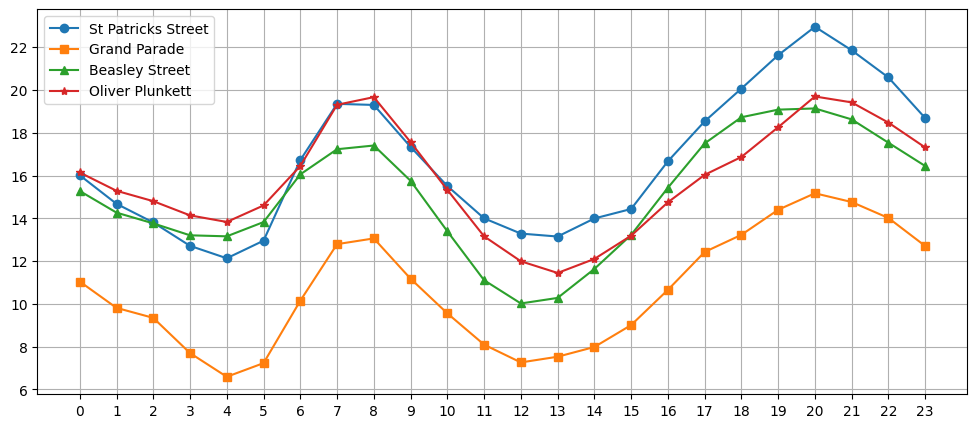

In [38]:
df_merged4['hour']=pd.to_datetime(df_merged4['date']).dt.hour
hourly_means=df_merged4.groupby('hour')[['NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','Oliver_Plunkett']].mean()

plt.figure(figsize=(12,5))
plt.plot(hourly_means.index, hourly_means['NO2_St_Patricks'], label='St Patricks Street', marker='o')
plt.plot(hourly_means.index, hourly_means['NO2_Grand_Parade'], label='Grand Parade', marker='s')
plt.plot(hourly_means.index, hourly_means['NO2_Beasley_Street'], label='Beasley Street', marker='^')
plt.plot(hourly_means.index, hourly_means['Oliver_Plunkett'], label='Oliver Plunkett', marker='*')

xticks=hourly_means.index[::1]
plt.xticks(xticks)
plt.legend()
plt.grid(True)

In [39]:
summer_months = df_merged4[(pd.to_datetime(df_merged4['date']).dt.month>=3) & (pd.to_datetime(df_merged4['date']).dt.month<=8)]
winter_months = df_merged4[(pd.to_datetime(df_merged4['date']).dt.month>=9) | (pd.to_datetime(df_merged4['date']).dt.month<=2)]

In [40]:
summer_mean=summer_months.groupby(pd.to_datetime(summer_months['date']).dt.hour)[['NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','Oliver_Plunkett']].mean()

In [41]:
winter_mean=winter_months.groupby(pd.to_datetime(winter_months['date']).dt.hour)[['NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','Oliver_Plunkett']].mean()

In [42]:
df_merged4['day_of_week']=pd.to_datetime(df_merged4['date']).dt.day_name()

In [43]:
df_merged4.head()

,date,rain,temp,wetb,dewpt,vappr,rhum,wdsp,wddir,sun,vis,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,Oliver_Plunkett,hour,day_of_week
0,2023-07-27 11:00:00,0.0,19.3,16.8,15.1,17.1,77.0,6.0,260.0,0.3,50000.0,5.035000,4.151000,NaN,NaN,11,Thursday
1,2023-07-27 12:00:00,0.0,20.7,17.8,15.9,18.1,74.0,6.0,240.0,0.9,50000.0,5.360333,4.458667,NaN,NaN,12,Thursday
2,2023-07-27 13:00:00,0.0,21.3,17.3,14.5,16.5,65.0,6.0,230.0,0.9,50000.0,5.173000,3.627667,NaN,NaN,13,Thursday
3,2023-07-27 14:00:00,0.0,22.4,16.9,12.9,14.8,55.0,8.0,240.0,1.0,50000.0,5.743333,3.740667,NaN,NaN,14,Thursday
4,2023-07-27 15:00:00,0.0,22.3,17.6,14.4,16.4,61.0,7.0,240.0,0.7,50000.0,5.773667,5.035667,NaN,NaN,15,Thursday


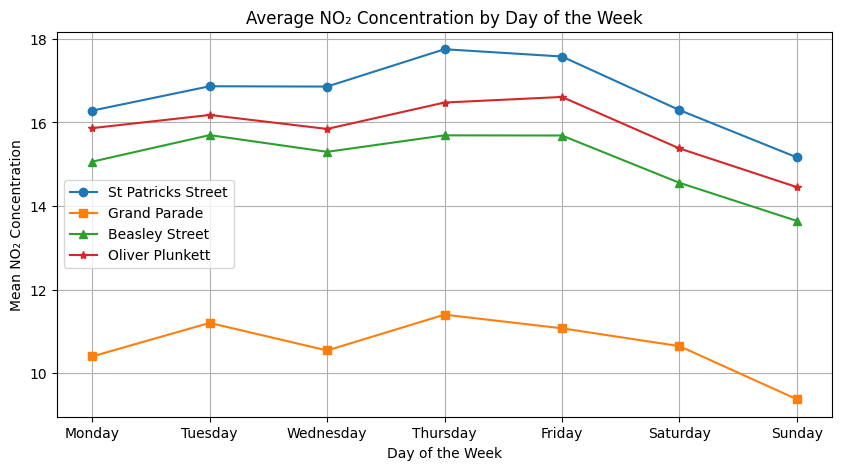

In [44]:
week_data=df_merged4.groupby('day_of_week')[['NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','Oliver_Plunkett']].mean()
# Reorder the index to standard weekday order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_data = week_data.reindex(ordered_days)

plt.figure(figsize=(10,5))
plt.plot(week_data.index, week_data['NO2_St_Patricks'], label='St Patricks Street', marker='o')
plt.plot(week_data.index, week_data['NO2_Grand_Parade'], label='Grand Parade', marker='s')
plt.plot(week_data.index, week_data['NO2_Beasley_Street'], label='Beasley Street', marker='^')
plt.plot(week_data.index, week_data['Oliver_Plunkett'], label='Oliver Plunkett', marker='*')

xticks=week_data.index[::1]
plt.xticks(xticks)
plt.title('Average NO₂ Concentration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean NO₂ Concentration')
plt.legend()
plt.grid(True)

## Preparing data from Traffic Counter 1
### Carrigrohane to Cork City, Western Road, Co. Cork

In [57]:
import pandas as pd

In [58]:
#july 2023 - july 2024 traffic data
# Load the file
july24_df = pd.read_csv("./mydata/traffic/counter 1/july-2024.csv")
july24_df.head()


,Unnamed: 0,01-07-2024,02-07-2024,03-07-2024,04-07-2024,05-07-2024,06-07-2024,07-07-2024,08-07-2024,09-07-2024,...,25-07-2024,26-07-2024,27-07-2024,28-07-2024,29-07-2024,30-07-2024,31-07-2024,Workday,7 Day,Count
0,00:00:00,74,43,53,63,63,105,144,102,41,...,50,77,131,124,57,56,51,66,86,2599
1,01:00:00,34,21,29,28,34,98,115,78,32,...,37,36,95,121,53,39,29,41,60,1806
2,02:00:00,41,18,27,37,30,83,116,50,22,...,31,36,68,134,21,12,23,31,51,1510
3,03:00:00,31,22,24,40,28,70,66,43,11,...,15,18,45,92,20,11,23,24,38,1145
4,04:00:00,31,17,20,32,23,21,27,23,24,...,19,23,26,38,25,17,24,24,26,787


In [59]:
july24_df.columns[0]
july24_df=july24_df.drop(['Count','Workday','7 Day'], axis=1)
july24_df.head()

,Unnamed: 0,01-07-2024,02-07-2024,03-07-2024,04-07-2024,05-07-2024,06-07-2024,07-07-2024,08-07-2024,09-07-2024,...,22-07-2024,23-07-2024,24-07-2024,25-07-2024,26-07-2024,27-07-2024,28-07-2024,29-07-2024,30-07-2024,31-07-2024
0,00:00:00,74,43,53,63,63,105,144,102,41,...,160,55,39,50,77,131,124,57,56,51
1,01:00:00,34,21,29,28,34,98,115,78,32,...,124,30,33,37,36,95,121,53,39,29
2,02:00:00,41,18,27,37,30,83,116,50,22,...,90,22,21,31,36,68,134,21,12,23
3,03:00:00,31,22,24,40,28,70,66,43,11,...,51,29,15,15,18,45,92,20,11,23
4,04:00:00,31,17,20,32,23,21,27,23,24,...,34,22,23,19,23,26,38,25,17,24


In [60]:
july24_df = july24_df.rename(columns={july24_df.columns[0]: 'hour'})  # rename first column to 'hour'
july24_df_long = pd.melt(july24_df, id_vars='hour', var_name='date', value_name='value')
july24_df_long.head()

,hour,date,value
0,00:00:00,01-07-2024,74
1,01:00:00,01-07-2024,34
2,02:00:00,01-07-2024,41
3,03:00:00,01-07-2024,31
4,04:00:00,01-07-2024,31


In [61]:
july24_df_long['datetime'] = pd.to_datetime(july24_df_long['date'].astype(str) + ' ' + july24_df_long['hour'].astype(str), format='%d-%m-%Y %H:%M:%S')
july24_df_long = july24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
july24_df_long.head()

,datetime,value
0,2024-07-01 00:00:00,74
1,2024-07-01 01:00:00,34
2,2024-07-01 02:00:00,41
3,2024-07-01 03:00:00,31
4,2024-07-01 04:00:00,31


In [62]:
jun24_df = pd.read_csv("./mydata/traffic/counter 1/june-24.csv")
jun24_df=jun24_df.drop(['Count','Workday','7 Day'], axis=1)
jun24_df = jun24_df.rename(columns={jun24_df.columns[0]: 'hour'})  # rename first column to 'hour'
jun24_df_long = pd.melt(jun24_df, id_vars='hour', var_name='date', value_name='value')
jun24_df_long['datetime'] = pd.to_datetime(jun24_df_long['date'].astype(str) + ' ' + jun24_df_long['hour'].astype(str))
jun24_df_long = jun24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
jun24_df_long.head()

,datetime,value
0,2024-06-01 00:00:00,163
1,2024-06-01 01:00:00,105
2,2024-06-01 02:00:00,76
3,2024-06-01 03:00:00,62
4,2024-06-01 04:00:00,23


In [63]:
jun23_df = pd.read_csv("./mydata/traffic/counter 1/june-23.csv")
jun23_df=jun23_df.drop(['Count','Workday','7 Day'], axis=1)
jun23_df = jun23_df.rename(columns={jun23_df.columns[0]: 'hour'})  # rename first column to 'hour'
jun23_df_long = pd.melt(jun23_df, id_vars='hour', var_name='date', value_name='value')
jun23_df_long['datetime'] = pd.to_datetime(jun23_df_long['date'].astype(str) + ' ' + jun23_df_long['hour'].astype(str))
jun23_df_long = jun23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
jun23_df_long.head()

,datetime,value
0,2023-06-01 00:00:00,90
1,2023-06-01 01:00:00,35
2,2023-06-01 02:00:00,26
3,2023-06-01 03:00:00,23
4,2023-06-01 04:00:00,33


In [64]:
combined_df = pd.concat([jun24_df_long, july24_df_long], ignore_index=True)
combined_df.head()


,datetime,value
0,2024-06-01 00:00:00,163
1,2024-06-01 01:00:00,105
2,2024-06-01 02:00:00,76
3,2024-06-01 03:00:00,62
4,2024-06-01 04:00:00,23


In [65]:
may24_df = pd.read_csv("./mydata/traffic/counter 1/may-24.csv")
may24_df=may24_df.drop(['Count','Workday','7 Day'], axis=1)
may24_df = may24_df.rename(columns={may24_df.columns[0]: 'hour'})  # rename first column to 'hour'
may24_df_long = pd.melt(may24_df, id_vars='hour', var_name='date', value_name='value')
may24_df_long['datetime'] = pd.to_datetime(may24_df_long['date'].astype(str) + ' ' + may24_df_long['hour'].astype(str))
may24_df_long = may24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
may24_df_long.head()

,datetime,value
0,2024-05-01 00:00:00,57
1,2024-05-01 01:00:00,34
2,2024-05-01 02:00:00,17
3,2024-05-01 03:00:00,14
4,2024-05-01 04:00:00,22


In [66]:
may23_df = pd.read_csv("./mydata/traffic/counter 1/may-23.csv")
may23_df=may23_df.drop(['Count','Workday','7 Day'], axis=1)
may23_df = may23_df.rename(columns={may23_df.columns[0]: 'hour'})  # rename first column to 'hour'
may23_df_long = pd.melt(may23_df, id_vars='hour', var_name='date', value_name='value')
may23_df_long['datetime'] = pd.to_datetime(may23_df_long['date'].astype(str) + ' ' + may23_df_long['hour'].astype(str))
may23_df_long = may23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
may23_df_long.head()

,datetime,value
0,2023-05-01 00:00:00,145
1,2023-05-01 01:00:00,130
2,2023-05-01 02:00:00,122
3,2023-05-01 03:00:00,92
4,2023-05-01 04:00:00,30


In [67]:
apr24_df = pd.read_csv("./mydata/traffic/counter 1/apr-24.csv")
apr24_df=apr24_df.drop(['Count','Workday','7 Day'], axis=1)
apr24_df = apr24_df.rename(columns={apr24_df.columns[0]: 'hour'})  # rename first column to 'hour'
apr24_df_long = pd.melt(apr24_df, id_vars='hour', var_name='date', value_name='value')
apr24_df_long['datetime'] = pd.to_datetime(apr24_df_long['date'].astype(str) + ' ' + apr24_df_long['hour'].astype(str))
apr24_df_long = apr24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
apr24_df_long.head()

,datetime,value
0,2024-04-01 00:00:00,141
1,2024-04-01 01:00:00,147
2,2024-04-01 02:00:00,118
3,2024-04-01 03:00:00,80
4,2024-04-01 04:00:00,46


In [68]:
apr23_df = pd.read_csv("./mydata/traffic/counter 1/apr-23.csv")
apr23_df=apr23_df.drop(['Count','Workday','7 Day'], axis=1)
apr23_df = apr23_df.rename(columns={apr23_df.columns[0]: 'hour'})  # rename first column to 'hour'
apr23_df_long = pd.melt(apr23_df, id_vars='hour', var_name='date', value_name='value')
apr23_df_long['datetime'] = pd.to_datetime(apr23_df_long['date'].astype(str) + ' ' + apr23_df_long['hour'].astype(str))
apr23_df_long = apr23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
apr23_df_long.head()

,datetime,value
0,2023-04-01 00:00:00,174
1,2023-04-01 01:00:00,162
2,2023-04-01 02:00:00,115
3,2023-04-01 03:00:00,92
4,2023-04-01 04:00:00,41


In [69]:
mar24_df = pd.read_csv("./mydata/traffic/counter 1/mar-24.csv")
mar24_df=mar24_df.drop(['Count','Workday','7 Day'], axis=1)
mar24_df =mar24_df.rename(columns={mar24_df.columns[0]: 'hour'})  # rename first column to 'hour'
mar24_df_long = pd.melt(mar24_df, id_vars='hour', var_name='date', value_name='value')
mar24_df_long['datetime'] = pd.to_datetime(mar24_df_long['date'].astype(str) + ' ' + mar24_df_long['hour'].astype(str))
mar24_df_long = mar24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
mar24_df_long.head()

,datetime,value
0,2024-03-01 00:00:00,82.0
1,2024-03-01 01:00:00,50.0
2,2024-03-01 02:00:00,56.0
3,2024-03-01 03:00:00,26.0
4,2024-03-01 04:00:00,31.0


In [70]:
mar23_df = pd.read_csv("./mydata/traffic/counter 1/mar-23.csv")
mar23_df=mar23_df.drop(['Count','Workday','7 Day'], axis=1)
mar23_df =mar23_df.rename(columns={mar23_df.columns[0]: 'hour'})  # rename first column to 'hour'
mar23_df_long = pd.melt(mar23_df, id_vars='hour', var_name='date', value_name='value')
mar23_df_long['datetime'] = pd.to_datetime(mar23_df_long['date'].astype(str) + ' ' + mar23_df_long['hour'].astype(str))
mar23_df_long = mar23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
mar23_df_long.head()

,datetime,value
0,2023-03-01 00:00:00,37
1,2023-03-01 01:00:00,40
2,2023-03-01 02:00:00,21
3,2023-03-01 03:00:00,14
4,2023-03-01 04:00:00,20


In [71]:
feb24_df = pd.read_csv("./mydata/traffic/counter 1/feb-24.csv")
feb24_df=feb24_df.drop(['Count','Workday','7 Day'], axis=1)
feb24_df =feb24_df.rename(columns={feb24_df.columns[0]: 'hour'})  # rename first column to 'hour'
feb24_df_long = pd.melt(feb24_df, id_vars='hour', var_name='date', value_name='value')
feb24_df_long['datetime'] = pd.to_datetime(feb24_df_long['date'].astype(str) + ' ' + feb24_df_long['hour'].astype(str))
feb24_df_long = feb24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
feb24_df_long.head()

,datetime,value
0,2024-02-01 00:00:00,69
1,2024-02-01 01:00:00,42
2,2024-02-01 02:00:00,22
3,2024-02-01 03:00:00,29
4,2024-02-01 04:00:00,29


In [72]:
feb23_df = pd.read_csv("./mydata/traffic/counter 1/feb-23.csv")
feb23_df=feb23_df.drop(['Count','Workday','7 Day'], axis=1)
feb23_df =feb23_df.rename(columns={feb23_df.columns[0]: 'hour'})  # rename first column to 'hour'
feb23_df_long = pd.melt(feb23_df, id_vars='hour', var_name='date', value_name='value')
feb23_df_long['datetime'] = pd.to_datetime(feb23_df_long['date'].astype(str) + ' ' + feb23_df_long['hour'].astype(str))
feb23_df_long = feb23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
feb23_df_long.head()

,datetime,value
0,2023-02-01 00:00:00,57
1,2023-02-01 01:00:00,47
2,2023-02-01 02:00:00,34
3,2023-02-01 03:00:00,16
4,2023-02-01 04:00:00,23


In [73]:
jan24_df = pd.read_csv("./mydata/traffic/counter 1/jan-24.csv")
jan24_df=jan24_df.drop(['Count','Workday','7 Day'], axis=1)
jan24_df =jan24_df.rename(columns={jan24_df.columns[0]: 'hour'})  # rename first column to 'hour'
jan24_df_long = pd.melt(jan24_df, id_vars='hour', var_name='date', value_name='value')
jan24_df_long['datetime'] = pd.to_datetime(jan24_df_long['date'].astype(str) + ' ' + jan24_df_long['hour'].astype(str))
jan24_df_long = jan24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
jan24_df_long.head()

,datetime,value
0,2024-01-01 00:00:00,173
1,2024-01-01 01:00:00,208
2,2024-01-01 02:00:00,175
3,2024-01-01 03:00:00,122
4,2024-01-01 04:00:00,59


In [74]:
jan23_df = pd.read_csv("./mydata/traffic/counter 1/jan-23.csv")
jan23_df=jan23_df.drop(['Count','Workday','7 Day'], axis=1)
jan23_df =jan23_df.rename(columns={jan23_df.columns[0]: 'hour'})  # rename first column to 'hour'
jan23_df_long = pd.melt(jan23_df, id_vars='hour', var_name='date', value_name='value')
jan23_df_long['datetime'] = pd.to_datetime(jan23_df_long['date'].astype(str) + ' ' + jan23_df_long['hour'].astype(str))
jan23_df_long = jan23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
jan23_df_long.head()

,datetime,value
0,2023-01-01 00:00:00,151
1,2023-01-01 01:00:00,219
2,2023-01-01 02:00:00,180
3,2023-01-01 03:00:00,137
4,2023-01-01 04:00:00,53


In [75]:
dec23_df = pd.read_csv("./mydata/traffic/counter 1/dec-23.csv")
dec23_df=dec23_df.drop(['Count','Workday','7 Day'], axis=1)
dec23_df =dec23_df.rename(columns={dec23_df.columns[0]: 'hour'})  # rename first column to 'hour'
dec23_df_long = pd.melt(dec23_df, id_vars='hour', var_name='date', value_name='value')
dec23_df_long['datetime'] = pd.to_datetime(dec23_df_long['date'].astype(str) + ' ' + dec23_df_long['hour'].astype(str))
dec23_df_long = dec23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
dec23_df_long.head()

,datetime,value
0,2023-12-01 00:00:00,179
1,2023-12-01 01:00:00,125
2,2023-12-01 02:00:00,92
3,2023-12-01 03:00:00,41
4,2023-12-01 04:00:00,32


In [76]:
dec24_df = pd.read_csv("./mydata/traffic/counter 1/dec-24.csv")
dec24_df=dec24_df.drop(['Count','Workday','7 Day'], axis=1)
dec24_df =dec24_df.rename(columns={dec24_df.columns[0]: 'hour'})  # rename first column to 'hour'
dec24_df_long = pd.melt(dec24_df, id_vars='hour', var_name='date', value_name='value')
dec24_df_long['datetime'] = pd.to_datetime(dec24_df_long['date'].astype(str) + ' ' + dec24_df_long['hour'].astype(str))
dec24_df_long = dec24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
dec24_df_long.head()

,datetime,value
0,2024-12-01 00:00:00,231
1,2024-12-01 01:00:00,166
2,2024-12-01 02:00:00,148
3,2024-12-01 03:00:00,143
4,2024-12-01 04:00:00,38


In [77]:
nov23_df = pd.read_csv("./mydata/traffic/counter 1/nov-23.csv")
nov23_df=nov23_df.drop(['Count','Workday','7 Day'], axis=1)
nov23_df =nov23_df.rename(columns={nov23_df.columns[0]: 'hour'})  # rename first column to 'hour'
nov23_df_long = pd.melt(nov23_df, id_vars='hour', var_name='date', value_name='value')
nov23_df_long['datetime'] = pd.to_datetime(nov23_df_long['date'].astype(str) + ' ' + nov23_df_long['hour'].astype(str))
nov23_df_long = nov23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
nov23_df_long.head()

,datetime,value
0,2023-11-01 00:00:00,181
1,2023-11-01 01:00:00,134
2,2023-11-01 02:00:00,124
3,2023-11-01 03:00:00,55
4,2023-11-01 04:00:00,28


In [78]:
nov24_df = pd.read_csv("./mydata/traffic/counter 1/nov-24.csv")
nov24_df=nov24_df.drop(['Count','Workday','7 Day'], axis=1)
nov24_df =nov24_df.rename(columns={nov24_df.columns[0]: 'hour'})  # rename first column to 'hour'
nov24_df_long = pd.melt(nov24_df, id_vars='hour', var_name='date', value_name='value')
nov24_df_long['datetime'] = pd.to_datetime(nov24_df_long['date'].astype(str) + ' ' + nov24_df_long['hour'].astype(str))
nov24_df_long = nov24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
nov24_df_long.head()

,datetime,value
0,2024-11-01 00:00:00,212
1,2024-11-01 01:00:00,193
2,2024-11-01 02:00:00,170
3,2024-11-01 03:00:00,110
4,2024-11-01 04:00:00,59


In [79]:
oct23_df = pd.read_csv("./mydata/traffic/counter 1/oct-23.csv")
oct23_df=oct23_df.drop(['Count','Workday','7 Day'], axis=1)
oct23_df =oct23_df.rename(columns={oct23_df.columns[0]: 'hour'})  # rename first column to 'hour'
oct23_df_long = pd.melt(oct23_df, id_vars='hour', var_name='date', value_name='value')
oct23_df_long['datetime'] = pd.to_datetime(oct23_df_long['date'].astype(str) + ' ' + oct23_df_long['hour'].astype(str))
oct23_df_long = oct23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
oct23_df_long.head()

,datetime,value
0,2023-10-01 00:00:00,212
1,2023-10-01 01:00:00,155
2,2023-10-01 02:00:00,130
3,2023-10-01 03:00:00,102
4,2023-10-01 04:00:00,28


In [80]:
oct24_df = pd.read_csv("./mydata/traffic/counter 1/oct-24.csv")
oct24_df=oct24_df.drop(['Count','Workday','7 Day'], axis=1)
oct24_df =oct24_df.rename(columns={oct24_df.columns[0]: 'hour'})  # rename first column to 'hour'
oct24_df_long = pd.melt(oct24_df, id_vars='hour', var_name='date', value_name='value')
oct24_df_long['datetime'] = pd.to_datetime(oct24_df_long['date'].astype(str) + ' ' + oct24_df_long['hour'].astype(str))
oct24_df_long = oct24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
oct24_df_long.head()

,datetime,value
0,2024-10-01 00:00:00,56
1,2024-10-01 01:00:00,28
2,2024-10-01 02:00:00,25
3,2024-10-01 03:00:00,22
4,2024-10-01 04:00:00,26


In [81]:
sep23_df = pd.read_csv("./mydata/traffic/counter 1/sep-23.csv")
sep23_df=sep23_df.drop(['Count','Workday','7 Day'], axis=1)
sep23_df =sep23_df.rename(columns={sep23_df.columns[0]: 'hour'})  # rename first column to 'hour'
sep23_df_long = pd.melt(sep23_df, id_vars='hour', var_name='date', value_name='value')
sep23_df_long['datetime'] = pd.to_datetime(sep23_df_long['date'].astype(str) + ' ' + sep23_df_long['hour'].astype(str))
sep23_df_long = sep23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
sep23_df_long.head()

,datetime,value
0,2023-09-01 00:00:00,73
1,2023-09-01 01:00:00,32
2,2023-09-01 02:00:00,38
3,2023-09-01 03:00:00,21
4,2023-09-01 04:00:00,26


In [82]:
sep24_df = pd.read_csv("./mydata/traffic/counter 1/sep-24.csv")
sep24_df=sep24_df.drop(['Count','Workday','7 Day'], axis=1)
sep24_df =sep24_df.rename(columns={sep24_df.columns[0]: 'hour'})  # rename first column to 'hour'
sep24_df_long = pd.melt(sep24_df, id_vars='hour', var_name='date', value_name='value')
sep24_df_long['datetime'] = pd.to_datetime(sep24_df_long['date'].astype(str) + ' ' + sep24_df_long['hour'].astype(str))
sep24_df_long = sep24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
sep24_df_long.head()

,datetime,value
0,2024-09-01 00:00:00,127
1,2024-09-01 01:00:00,131
2,2024-09-01 02:00:00,109
3,2024-09-01 03:00:00,78
4,2024-09-01 04:00:00,53


In [83]:
aug23_df = pd.read_csv("./mydata/traffic/counter 1/aug-23.csv")
aug23_df=aug23_df.drop(['Count','Workday','7 Day'], axis=1)
aug23_df =aug23_df.rename(columns={aug23_df.columns[0]: 'hour'})  # rename first column to 'hour'
aug23_df_long = pd.melt(aug23_df, id_vars='hour', var_name='date', value_name='value')
aug23_df_long['datetime'] = pd.to_datetime(aug23_df_long['date'].astype(str) + ' ' + aug23_df_long['hour'].astype(str))
aug23_df_long = aug23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
aug23_df_long.head()

,datetime,value
0,2023-08-01 00:00:00,59
1,2023-08-01 01:00:00,52
2,2023-08-01 02:00:00,28
3,2023-08-01 03:00:00,23
4,2023-08-01 04:00:00,28


In [84]:
aug24_df = pd.read_csv("./mydata/traffic/counter 1/aug-24.csv")
aug24_df=aug24_df.drop(['Count','Workday','7 Day'], axis=1)
aug24_df =aug24_df.rename(columns={aug24_df.columns[0]: 'hour'})  # rename first column to 'hour'
aug24_df_long = pd.melt(aug24_df, id_vars='hour', var_name='date', value_name='value')
aug24_df_long['datetime'] = pd.to_datetime(aug24_df_long['date'].astype(str) + ' ' + aug24_df_long['hour'].astype(str))
aug24_df_long = aug24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
aug24_df_long.head()

,datetime,value
0,2024-08-01 00:00:00,52
1,2024-08-01 01:00:00,25
2,2024-08-01 02:00:00,16
3,2024-08-01 03:00:00,20
4,2024-08-01 04:00:00,24


In [85]:
jul23_df = pd.read_csv("./mydata/traffic/counter 1/jul-23.csv")
jul23_df=jul23_df.drop(['Count','Workday','7 Day'], axis=1)
jul23_df =jul23_df.rename(columns={jul23_df.columns[0]: 'hour'})  # rename first column to 'hour'
jul23_df_long = pd.melt(jul23_df, id_vars='hour', var_name='date', value_name='value')
jul23_df_long['datetime'] = pd.to_datetime(jul23_df_long['date'].astype(str) + ' ' + jul23_df_long['hour'].astype(str))
jul23_df_long = jul23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
jul23_df_long.head()

,datetime,value
0,2023-07-01 00:00:00,128
1,2023-07-01 01:00:00,109
2,2023-07-01 02:00:00,101
3,2023-07-01 03:00:00,52
4,2023-07-01 04:00:00,44


In [94]:
combined_df = pd.concat([nov24_df_long, dec24_df_long], ignore_index=True)
combined_df = pd.concat([oct24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([sep24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([aug24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([july24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([jun24_df_long, combined_df], ignore_index=True)

combined_df.head()

,datetime,value
0,2024-06-01 00:00:00,163
1,2024-06-01 01:00:00,105
2,2024-06-01 02:00:00,76
3,2024-06-01 03:00:00,62
4,2024-06-01 04:00:00,23


In [95]:
combined_df = pd.concat([may24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([apr24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([mar24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([feb24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([jan24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([dec23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([nov23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([oct23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([sep23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([aug23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([jul23_df_long, combined_df], ignore_index=True)
combined_df.head()

,datetime,value
0,2023-07-01 00:00:00,128.0
1,2023-07-01 01:00:00,109.0
2,2023-07-01 02:00:00,101.0
3,2023-07-01 03:00:00,52.0
4,2023-07-01 04:00:00,44.0


In [96]:
combined_df = pd.concat([jun23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([may23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([apr23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([mar23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([feb23_df_long, combined_df], ignore_index=True)
combined_df1 = pd.concat([jan23_df_long, combined_df], ignore_index=True)
combined_df1.head()

,datetime,value
0,2023-01-01 00:00:00,151.0
1,2023-01-01 01:00:00,219.0
2,2023-01-01 02:00:00,180.0
3,2023-01-01 03:00:00,137.0
4,2023-01-01 04:00:00,53.0


In [97]:
combined_df1.tail()

,datetime,value
17539,2024-12-31 19:00:00,377.0
17540,2024-12-31 20:00:00,353.0
17541,2024-12-31 21:00:00,236.0
17542,2024-12-31 22:00:00,172.0
17543,2024-12-31 23:00:00,130.0


In [34]:
combined_df1.to_csv('./mydata/traffic/2023-24 complete years.csv')

In [2]:
r3_personal=pd.read_csv('./mydata/traffic/counter 3/car-data/personal_veh_cnt.csv')
r3_personal.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,datetime,value
0,0,2023-01-01 00:00:00,384.0
1,1,2023-01-01 01:00:00,415.0
2,2,2023-01-01 02:00:00,270.0
3,3,2023-01-01 03:00:00,217.0
4,4,2023-01-01 04:00:00,105.0


In [2]:
r1=pd.read_csv('./mydata/traffic/2023-24 complete years.csv')
r1.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,datetime,value
0,0,01-01-2023 00:00,151.0
1,1,01-01-2023 01:00,219.0
2,2,01-01-2023 02:00,180.0
3,3,01-01-2023 03:00,137.0
4,4,01-01-2023 04:00,53.0


In [5]:
r1 = r1[r1['datetime']!='31-03-2024 01:00']

In [6]:
len(r1)

17543

In [33]:
combined_df1=pd.read_csv('./mydata/ST_PATRICKS_24_ANALYSIS/AFFECTED_COUNTERS/counter 28/2023-24 complete.csv')

In [98]:
import numpy as np


# weath_traff.reset_index(inplace=True)
combined_df1['datetime'] = pd.to_datetime(combined_df1['datetime'])

# Extract hour from the datetime column
combined_df1['hour'] = combined_df1['datetime'].dt.hour
combined_df1['day_of_week'] = combined_df1['datetime'].dt.dayofweek

# Check missing values in average_volume
missing_mask = combined_df1['value'].isna()

# Calculate mean traffic volume grouped by day_of_week and hour (excluding missing)
mean_volumes = combined_df1.groupby(['day_of_week', 'hour'])['value'].mean()

# Fill missing values by mapping day_of_week and hour to mean volume
combined_df1.loc[missing_mask, 'value'] = combined_df1.loc[missing_mask].apply(
    lambda row: int(np.floor(mean_volumes.loc[(row['day_of_week'], row['hour'])])), axis=1
)

In [99]:
combined_df1.loc[missing_mask, 'datetime'],combined_df1.loc[missing_mask, 'value']

(10921   2024-03-31 01:00:00
 Name: datetime, dtype: datetime64[ns],
 10921    150.0
 Name: value, dtype: float64)

## Preparing data from Traffic Counter 2
### N27 Between Cork & N40 Southlink road Cork

In [16]:
import pandas as pd

In [7]:
july24_df = pd.read_csv("./mydata/traffic/counter 2/july-24.csv")
july24_df=july24_df.drop(['Count','Workday','7 Day'], axis=1)
july24_df=july24_df.rename(columns={july24_df.columns[0]: 'hour'})  # rename first column to 'hour'
july24_df_long = pd.melt(july24_df, id_vars='hour', var_name='date', value_name='value')
july24_df_long['datetime'] = pd.to_datetime(july24_df_long['date'].astype(str) + ' ' + july24_df_long['hour'].astype(str))
july24_df_long = july24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
july24_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2024-07-01 00:00:00,222
1,2024-07-01 01:00:00,135
2,2024-07-01 02:00:00,133
3,2024-07-01 03:00:00,230
4,2024-07-01 04:00:00,205


In [8]:
jun24_df = pd.read_csv("./mydata/traffic/counter 2/jun-24.csv")
jun24_df=jun24_df.drop(['Count','Workday','7 Day'], axis=1)
jun24_df = jun24_df.rename(columns={jun24_df.columns[0]: 'hour'})  # rename first column to 'hour'
jun24_df_long = pd.melt(jun24_df, id_vars='hour', var_name='date', value_name='value')
jun24_df_long['datetime'] = pd.to_datetime(jun24_df_long['date'].astype(str) + ' ' + jun24_df_long['hour'].astype(str))
jun24_df_long = jun24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
jun24_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2024-06-01 00:00:00,559
1,2024-06-01 01:00:00,352
2,2024-06-01 02:00:00,275
3,2024-06-01 03:00:00,236
4,2024-06-01 04:00:00,243


In [9]:
jun23_df = pd.read_csv("./mydata/traffic/counter 2/jun-23.csv")
jun23_df=jun23_df.drop(['Count','Workday','7 Day'], axis=1)
jun23_df = jun23_df.rename(columns={jun23_df.columns[0]: 'hour'})  # rename first column to 'hour'
jun23_df_long = pd.melt(jun23_df, id_vars='hour', var_name='date', value_name='value')
jun23_df_long['datetime'] = pd.to_datetime(jun23_df_long['date'].astype(str) + ' ' + jun23_df_long['hour'].astype(str))
jun23_df_long = jun23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
jun23_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-06-01 00:00:00,285
1,2023-06-01 01:00:00,151
2,2023-06-01 02:00:00,109
3,2023-06-01 03:00:00,131
4,2023-06-01 04:00:00,207


In [10]:
may24_df = pd.read_csv("./mydata/traffic/counter 2/may-24.csv")
may24_df=may24_df.drop(['Count','Workday','7 Day'], axis=1)
may24_df = may24_df.rename(columns={may24_df.columns[0]: 'hour'})  # rename first column to 'hour'
may24_df_long = pd.melt(may24_df, id_vars='hour', var_name='date', value_name='value')
may24_df_long['datetime'] = pd.to_datetime(may24_df_long['date'].astype(str) + ' ' + may24_df_long['hour'].astype(str))
may24_df_long = may24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
may24_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2024-05-01 00:00:00,385
1,2024-05-01 01:00:00,266
2,2024-05-01 02:00:00,249
3,2024-05-01 03:00:00,236
4,2024-05-01 04:00:00,222


In [11]:
may23_df = pd.read_csv("./mydata/traffic/counter 2/may-23.csv")
may23_df=may23_df.drop(['Count','Workday','7 Day'], axis=1)
may23_df = may23_df.rename(columns={may23_df.columns[0]: 'hour'})  # rename first column to 'hour'
may23_df_long = pd.melt(may23_df, id_vars='hour', var_name='date', value_name='value')
may23_df_long['datetime'] = pd.to_datetime(may23_df_long['date'].astype(str) + ' ' + may23_df_long['hour'].astype(str))
may23_df_long = may23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
may23_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-05-01 00:00:00,499
1,2023-05-01 01:00:00,358
2,2023-05-01 02:00:00,304
3,2023-05-01 03:00:00,241
4,2023-05-01 04:00:00,174


In [12]:
apr24_df = pd.read_csv("./mydata/traffic/counter 2/apr-24.csv")
apr24_df=apr24_df.drop(['Count','Workday','7 Day'], axis=1)
apr24_df = apr24_df.rename(columns={apr24_df.columns[0]: 'hour'})  # rename first column to 'hour'
apr24_df_long = pd.melt(apr24_df, id_vars='hour', var_name='date', value_name='value')
apr24_df_long['datetime'] = pd.to_datetime(apr24_df_long['date'].astype(str) + ' ' + apr24_df_long['hour'].astype(str))
apr24_df_long = apr24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
apr24_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2024-04-01 00:00:00,377
1,2024-04-01 01:00:00,291
2,2024-04-01 02:00:00,223
3,2024-04-01 03:00:00,259
4,2024-04-01 04:00:00,163


In [13]:
apr23_df = pd.read_csv("./mydata/traffic/counter 2/apr-23.csv")
apr23_df=apr23_df.drop(['Count','Workday','7 Day'], axis=1)
apr23_df = apr23_df.rename(columns={apr23_df.columns[0]: 'hour'})  # rename first column to 'hour'
apr23_df_long = pd.melt(apr23_df, id_vars='hour', var_name='date', value_name='value')
apr23_df_long['datetime'] = pd.to_datetime(apr23_df_long['date'].astype(str) + ' ' + apr23_df_long['hour'].astype(str))
apr23_df_long = apr23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
apr23_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-04-01 00:00:00,504
1,2023-04-01 01:00:00,303
2,2023-04-01 02:00:00,301
3,2023-04-01 03:00:00,216
4,2023-04-01 04:00:00,172


In [14]:
mar24_df = pd.read_csv("./mydata/traffic/counter 2/mar-24.csv")
mar24_df=mar24_df.drop(['Count','Workday','7 Day'], axis=1)
mar24_df =mar24_df.rename(columns={mar24_df.columns[0]: 'hour'})  # rename first column to 'hour'
mar24_df_long = pd.melt(mar24_df, id_vars='hour', var_name='date', value_name='value')
mar24_df_long['datetime'] = pd.to_datetime(mar24_df_long['date'].astype(str) + ' ' + mar24_df_long['hour'].astype(str))
mar24_df_long = mar24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
mar24_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2024-03-01 00:00:00,306
1,2024-03-01 01:00:00,203
2,2024-03-01 02:00:00,139
3,2024-03-01 03:00:00,131
4,2024-03-01 04:00:00,187


In [15]:
mar23_df = pd.read_csv("./mydata/traffic/counter 2/mar-23.csv")
mar23_df=mar23_df.drop(['Count','Workday','7 Day'], axis=1)
mar23_df =mar23_df.rename(columns={mar23_df.columns[0]: 'hour'})  # rename first column to 'hour'
mar23_df_long = pd.melt(mar23_df, id_vars='hour', var_name='date', value_name='value')
mar23_df_long['datetime'] = pd.to_datetime(mar23_df_long['date'].astype(str) + ' ' + mar23_df_long['hour'].astype(str))
mar23_df_long = mar23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
mar23_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-03-01 00:00:00,191
1,2023-03-01 01:00:00,96
2,2023-03-01 02:00:00,96
3,2023-03-01 03:00:00,91
4,2023-03-01 04:00:00,185


In [16]:
feb24_df = pd.read_csv("./mydata/traffic/counter 2/feb-24.csv")
feb24_df=feb24_df.drop(['Count','Workday','7 Day'], axis=1)
feb24_df =feb24_df.rename(columns={feb24_df.columns[0]: 'hour'})  # rename first column to 'hour'
feb24_df_long = pd.melt(feb24_df, id_vars='hour', var_name='date', value_name='value')
feb24_df_long['datetime'] = pd.to_datetime(feb24_df_long['date'].astype(str) + ' ' + feb24_df_long['hour'].astype(str))
feb24_df_long = feb24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
feb24_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2024-02-01 00:00:00,208
1,2024-02-01 01:00:00,126
2,2024-02-01 02:00:00,105
3,2024-02-01 03:00:00,151
4,2024-02-01 04:00:00,200


In [17]:
feb23_df = pd.read_csv("./mydata/traffic/counter 2/feb-23.csv")
feb23_df=feb23_df.drop(['Count','Workday','7 Day'], axis=1)
feb23_df =feb23_df.rename(columns={feb23_df.columns[0]: 'hour'})  # rename first column to 'hour'
feb23_df_long = pd.melt(feb23_df, id_vars='hour', var_name='date', value_name='value')
feb23_df_long['datetime'] = pd.to_datetime(feb23_df_long['date'].astype(str) + ' ' + feb23_df_long['hour'].astype(str))
feb23_df_long = feb23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
feb23_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-02-01 00:00:00,176
1,2023-02-01 01:00:00,95
2,2023-02-01 02:00:00,91
3,2023-02-01 03:00:00,77
4,2023-02-01 04:00:00,150


In [18]:
jan24_df = pd.read_csv("./mydata/traffic/counter 2/jan-24.csv")
jan24_df=jan24_df.drop(['Count','Workday','7 Day'], axis=1)
jan24_df =jan24_df.rename(columns={jan24_df.columns[0]: 'hour'})  # rename first column to 'hour'
jan24_df_long = pd.melt(jan24_df, id_vars='hour', var_name='date', value_name='value')
jan24_df_long['datetime'] = pd.to_datetime(jan24_df_long['date'].astype(str) + ' ' + jan24_df_long['hour'].astype(str))
jan24_df_long = jan24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
jan24_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2024-01-01 00:00:00,536.0
1,2024-01-01 01:00:00,541.0
2,2024-01-01 02:00:00,438.0
3,2024-01-01 03:00:00,376.0
4,2024-01-01 04:00:00,211.0


In [19]:
jan23_df = pd.read_csv("./mydata/traffic/counter 2/jan-23.csv")
jan23_df=jan23_df.drop(['Count','Workday','7 Day'], axis=1)
jan23_df =jan23_df.rename(columns={jan23_df.columns[0]: 'hour'})  # rename first column to 'hour'
jan23_df_long = pd.melt(jan23_df, id_vars='hour', var_name='date', value_name='value')
jan23_df_long['datetime'] = pd.to_datetime(jan23_df_long['date'].astype(str) + ' ' + jan23_df_long['hour'].astype(str))
jan23_df_long = jan23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
jan23_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-01-01 00:00:00,496
1,2023-01-01 01:00:00,503
2,2023-01-01 02:00:00,409
3,2023-01-01 03:00:00,330
4,2023-01-01 04:00:00,143


In [20]:
dec23_df = pd.read_csv("./mydata/traffic/counter 2/dec-23.csv")
dec23_df=dec23_df.drop(['Count','Workday','7 Day'], axis=1)
dec23_df =dec23_df.rename(columns={dec23_df.columns[0]: 'hour'})  # rename first column to 'hour'
dec23_df_long = pd.melt(dec23_df, id_vars='hour', var_name='date', value_name='value')
dec23_df_long['datetime'] = pd.to_datetime(dec23_df_long['date'].astype(str) + ' ' + dec23_df_long['hour'].astype(str))
dec23_df_long = dec23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
dec23_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-12-01 00:00:00,476
1,2023-12-01 01:00:00,267
2,2023-12-01 02:00:00,204
3,2023-12-01 03:00:00,167
4,2023-12-01 04:00:00,210


In [21]:
dec24_df = pd.read_csv("./mydata/traffic/counter 2/dec-24.csv")
dec24_df=dec24_df.drop(['Count','Workday','7 Day'], axis=1)
dec24_df =dec24_df.rename(columns={dec24_df.columns[0]: 'hour'})  # rename first column to 'hour'
dec24_df_long = pd.melt(dec24_df, id_vars='hour', var_name='date', value_name='value')
dec24_df_long['datetime'] = pd.to_datetime(dec24_df_long['date'].astype(str) + ' ' + dec24_df_long['hour'].astype(str))
dec24_df_long = dec24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
dec24_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2024-12-01 00:00:00,661
1,2024-12-01 01:00:00,497
2,2024-12-01 02:00:00,398
3,2024-12-01 03:00:00,349
4,2024-12-01 04:00:00,187


In [22]:
nov23_df = pd.read_csv("./mydata/traffic/counter 2/nov-23.csv")
nov23_df=nov23_df.drop(['Count','Workday','7 Day'], axis=1)
nov23_df =nov23_df.rename(columns={nov23_df.columns[0]: 'hour'})  # rename first column to 'hour'
nov23_df_long = pd.melt(nov23_df, id_vars='hour', var_name='date', value_name='value')
nov23_df_long['datetime'] = pd.to_datetime(nov23_df_long['date'].astype(str) + ' ' + nov23_df_long['hour'].astype(str))
nov23_df_long = nov23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
nov23_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-11-01 00:00:00,474
1,2023-11-01 01:00:00,397
2,2023-11-01 02:00:00,374
3,2023-11-01 03:00:00,253
4,2023-11-01 04:00:00,211


In [23]:
nov24_df = pd.read_csv("./mydata/traffic/counter 2/nov-24.csv")
nov24_df=nov24_df.drop(['Count','Workday','7 Day'], axis=1)
nov24_df =nov24_df.rename(columns={nov24_df.columns[0]: 'hour'})  # rename first column to 'hour'
nov24_df_long = pd.melt(nov24_df, id_vars='hour', var_name='date', value_name='value')
nov24_df_long['datetime'] = pd.to_datetime(nov24_df_long['date'].astype(str) + ' ' + nov24_df_long['hour'].astype(str))
nov24_df_long = nov24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
nov24_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2024-11-01 00:00:00,695
1,2024-11-01 01:00:00,539
2,2024-11-01 02:00:00,530
3,2024-11-01 03:00:00,340
4,2024-11-01 04:00:00,308


In [24]:
oct23_df = pd.read_csv("./mydata/traffic/counter 2/oct-23.csv")
oct23_df=oct23_df.drop(['Count','Workday','7 Day'], axis=1)
oct23_df =oct23_df.rename(columns={oct23_df.columns[0]: 'hour'})  # rename first column to 'hour'
oct23_df_long = pd.melt(oct23_df, id_vars='hour', var_name='date', value_name='value')
oct23_df_long['datetime'] = pd.to_datetime(oct23_df_long['date'].astype(str) + ' ' + oct23_df_long['hour'].astype(str))
oct23_df_long = oct23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
oct23_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-10-01 00:00:00,519
1,2023-10-01 01:00:00,412
2,2023-10-01 02:00:00,341
3,2023-10-01 03:00:00,274
4,2023-10-01 04:00:00,204


In [25]:
oct24_df = pd.read_csv("./mydata/traffic/counter 2/oct-24.csv")
oct24_df=oct24_df.drop(['Count','Workday','7 Day'], axis=1)
oct24_df =oct24_df.rename(columns={oct24_df.columns[0]: 'hour'})  # rename first column to 'hour'
oct24_df_long = pd.melt(oct24_df, id_vars='hour', var_name='date', value_name='value')
oct24_df_long['datetime'] = pd.to_datetime(oct24_df_long['date'].astype(str) + ' ' + oct24_df_long['hour'].astype(str))
oct24_df_long = oct24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
oct24_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2024-10-01 00:00:00,475
1,2024-10-01 01:00:00,201
2,2024-10-01 02:00:00,151
3,2024-10-01 03:00:00,209
4,2024-10-01 04:00:00,213


In [26]:
sep23_df = pd.read_csv("./mydata/traffic/counter 2/sep-23.csv")
sep23_df=sep23_df.drop(['Count','Workday','7 Day'], axis=1)
sep23_df =sep23_df.rename(columns={sep23_df.columns[0]: 'hour'})  # rename first column to 'hour'
sep23_df_long = pd.melt(sep23_df, id_vars='hour', var_name='date', value_name='value')
sep23_df_long['datetime'] = pd.to_datetime(sep23_df_long['date'].astype(str) + ' ' + sep23_df_long['hour'].astype(str))
sep23_df_long = sep23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
sep23_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-09-01 00:00:00,316
1,2023-09-01 01:00:00,134
2,2023-09-01 02:00:00,140
3,2023-09-01 03:00:00,103
4,2023-09-01 04:00:00,242


In [27]:
sep24_df = pd.read_csv("./mydata/traffic/counter 2/sep-24.csv")
sep24_df=sep24_df.drop(['Count','Workday','7 Day'], axis=1)
sep24_df =sep24_df.rename(columns={sep24_df.columns[0]: 'hour'})  # rename first column to 'hour'
sep24_df_long = pd.melt(sep24_df, id_vars='hour', var_name='date', value_name='value')
sep24_df_long['datetime'] = pd.to_datetime(sep24_df_long['date'].astype(str) + ' ' + sep24_df_long['hour'].astype(str))
sep24_df_long = sep24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
sep24_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2024-09-01 00:00:00,514
1,2024-09-01 01:00:00,385
2,2024-09-01 02:00:00,333
3,2024-09-01 03:00:00,338
4,2024-09-01 04:00:00,228


In [28]:
aug23_df = pd.read_csv("./mydata/traffic/counter 2/aug-23.csv")
aug23_df=aug23_df.drop(['Count','Workday','7 Day'], axis=1)
aug23_df =aug23_df.rename(columns={aug23_df.columns[0]: 'hour'})  # rename first column to 'hour'
aug23_df_long = pd.melt(aug23_df, id_vars='hour', var_name='date', value_name='value')
aug23_df_long['datetime'] = pd.to_datetime(aug23_df_long['date'].astype(str) + ' ' + aug23_df_long['hour'].astype(str))
aug23_df_long = aug23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
aug23_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-08-01 00:00:00,332
1,2023-08-01 01:00:00,131
2,2023-08-01 02:00:00,102
3,2023-08-01 03:00:00,117
4,2023-08-01 04:00:00,198


In [29]:
aug24_df = pd.read_csv("./mydata/traffic/counter 2/aug-24.csv")
aug24_df=aug24_df.drop(['Count','Workday','7 Day'], axis=1)
aug24_df =aug24_df.rename(columns={aug24_df.columns[0]: 'hour'})  # rename first column to 'hour'
aug24_df_long = pd.melt(aug24_df, id_vars='hour', var_name='date', value_name='value')
aug24_df_long['datetime'] = pd.to_datetime(aug24_df_long['date'].astype(str) + ' ' + aug24_df_long['hour'].astype(str))
aug24_df_long = aug24_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
aug24_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2024-08-01 00:00:00,327
1,2024-08-01 01:00:00,181
2,2024-08-01 02:00:00,136
3,2024-08-01 03:00:00,182
4,2024-08-01 04:00:00,246


In [30]:
jul23_df = pd.read_csv("./mydata/traffic/counter 2/jul-23.csv")
jul23_df=jul23_df.drop(['Count','Workday','7 Day'], axis=1)
jul23_df =jul23_df.rename(columns={jul23_df.columns[0]: 'hour'})  # rename first column to 'hour'
jul23_df_long = pd.melt(jul23_df, id_vars='hour', var_name='date', value_name='value')
jul23_df_long['datetime'] = pd.to_datetime(jul23_df_long['date'].astype(str) + ' ' + jul23_df_long['hour'].astype(str))
jul23_df_long = jul23_df_long[['datetime', 'value']].sort_values('datetime').reset_index(drop=True)
jul23_df_long.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-07-01 00:00:00,546
1,2023-07-01 01:00:00,332
2,2023-07-01 02:00:00,311
3,2023-07-01 03:00:00,270
4,2023-07-01 04:00:00,227


In [31]:
combined_df = pd.concat([nov24_df_long, dec24_df_long], ignore_index=True)
combined_df = pd.concat([oct24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([sep24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([aug24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([july24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([jun24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([may24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([apr24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([mar24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([feb24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([jan24_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([dec23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([nov23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([oct23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([sep23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([aug23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([jul23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([may23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([apr23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([mar23_df_long, combined_df], ignore_index=True)
combined_df = pd.concat([feb23_df_long, combined_df], ignore_index=True)
combined_df2 = pd.concat([jan23_df_long, combined_df], ignore_index=True)
combined_df2.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,datetime,value
0,2023-01-01 00:00:00,496.0
1,2023-01-01 01:00:00,503.0
2,2023-01-01 02:00:00,409.0
3,2023-01-01 03:00:00,330.0
4,2023-01-01 04:00:00,143.0


In [32]:
combined_df2.tail()

,datetime,value
16819,2024-12-31 19:00:00,1248.0
16820,2024-12-31 20:00:00,986.0
16821,2024-12-31 21:00:00,707.0
16822,2024-12-31 22:00:00,534.0
16823,2024-12-31 23:00:00,412.0


In [33]:
combined_df2.to_csv('./mydata/traffic/2023-24 complete years_r2.csv')

In [169]:
combined_df2=pd.read_csv('./mydata/traffic/2023-24 complete years_r2.csv')

In [80]:
combined_df2[combined_df2['datetime']=='2024-10-27 02:00:00']

,Unnamed: 0,datetime,value
15242,15242,2024-10-27 02:00:00,1122.0


In [ ]:
combined_df2['datetime']=pd.to_datetime(combined_df2['datetime'], )

In [46]:
len(combined_df2), len(r1)

(16824, 17543)

In [81]:
import pandas as pd

# Generate full hourly range in Europe/Dublin timezone
full_range = pd.date_range(
    start='2023-01-01 00:00:00',
    end='2024-12-31 23:00:00',
    freq='H',
    tz='Europe/Dublin'
)

# Check length (should be 17542 if both DST skips applied)
print(len(full_range))  # Expected: 17542


17544


In [172]:

full_df = pd.DataFrame({'datetime': full_range})

combined_df2['datetime'] = pd.to_datetime(combined_df2['datetime']).dt.tz_localize('Europe/Dublin', ambiguous='NaT', nonexistent='NaT')
# combined_df2['datetime'] = pd.to_datetime(combined_df2['datetime']).dt.tz_localize('Europe/Dublin', nonexistent='NaT')


# Left join
road2 = full_df.merge(combined_df2, on='datetime', how='left')


In [173]:
road2.head()

,datetime,Unnamed: 0,value
0,2023-01-01 00:00:00+00:00,0.0,496.0
1,2023-01-01 01:00:00+00:00,1.0,503.0
2,2023-01-01 02:00:00+00:00,2.0,409.0
3,2023-01-01 03:00:00+00:00,3.0,330.0
4,2023-01-01 04:00:00+00:00,4.0,143.0


In [177]:
len(road2)

road2[road2['value'].isnull()]
# road2.iloc[7200:7230]

,datetime,Unnamed: 0,value
3623,2023-06-01 00:00:00+01:00,NaN,NaN
3624,2023-06-01 01:00:00+01:00,NaN,NaN
3625,2023-06-01 02:00:00+01:00,NaN,NaN
3626,2023-06-01 03:00:00+01:00,NaN,NaN
3627,2023-06-01 04:00:00+01:00,NaN,NaN
...,...,...,...
8962,2024-01-09 10:00:00+00:00,8242.0,NaN
8963,2024-01-09 11:00:00+00:00,8243.0,NaN
8964,2024-01-09 12:00:00+00:00,8244.0,NaN
15960,2024-10-27 01:00:00+01:00,NaN,NaN


In [178]:
r1.head()

,Unnamed: 0,datetime,value
0,0,01-01-2023 00:00,151.0
1,1,01-01-2023 01:00,219.0
2,2,01-01-2023 02:00,180.0
3,3,01-01-2023 03:00,137.0
4,4,01-01-2023 04:00,53.0


In [179]:
r1['datetime'] = pd.to_datetime(r1['datetime']).dt.tz_localize('Europe/Dublin', ambiguous='NaT', nonexistent='NaT')
road1 = full_df.merge(r1, on='datetime', how='left')

In [180]:
len(road1)

17544

In [195]:
road1.head()

,datetime,Unnamed: 0,value
0,2023-01-01 00:00:00+00:00,0.0,151.0
1,2023-01-01 01:00:00+00:00,1.0,219.0
2,2023-01-01 02:00:00+00:00,2.0,180.0
3,2023-01-01 03:00:00+00:00,3.0,137.0
4,2023-01-01 04:00:00+00:00,4.0,53.0


In [182]:
full_range

DatetimeIndex(['2023-01-01 00:00:00+00:00', '2023-01-01 01:00:00+00:00',
               '2023-01-01 02:00:00+00:00', '2023-01-01 03:00:00+00:00',
               '2023-01-01 04:00:00+00:00', '2023-01-01 05:00:00+00:00',
               '2023-01-01 06:00:00+00:00', '2023-01-01 07:00:00+00:00',
               '2023-01-01 08:00:00+00:00', '2023-01-01 09:00:00+00:00',
               ...
               '2024-12-31 14:00:00+00:00', '2024-12-31 15:00:00+00:00',
               '2024-12-31 16:00:00+00:00', '2024-12-31 17:00:00+00:00',
               '2024-12-31 18:00:00+00:00', '2024-12-31 19:00:00+00:00',
               '2024-12-31 20:00:00+00:00', '2024-12-31 21:00:00+00:00',
               '2024-12-31 22:00:00+00:00', '2024-12-31 23:00:00+00:00'],
              dtype='datetime64[ns, Europe/Dublin]', length=17544, freq='H')

In [183]:
full_combined_traffic=pd.DataFrame({
    'Timestamp':road1['datetime'],
    'counter 1':road1['value'],
    'counter 2':road2['value']
})

In [1]:
full_range = pd.date_range(
    start='2023-01-01 00:00:00',
    end='2024-12-31 23:00:00',
    freq='H',
    tz='Europe/Dublin'
)
weather=pd.read_csv('./mydata/datasets_for_model/weather_23_24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
weather.head()

,Unnamed: 0,Timestamp,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,ww,w,sun,vis,clht,clamt,date
0,0,2023-01-01 00:00:00+00:00,0.0,5.2,4.9,4.4,8.4,95.0,996.5,8.0,220.0,2.0,82.0,0.0,15000.0,200.0,6.0,01-01-2023
1,1,2023-01-01 01:00:00+00:00,0.0,4.7,4.3,3.8,8.0,93.0,996.9,6.0,210.0,2.0,11.0,0.0,20000.0,40.0,5.0,01-01-2023
2,2,2023-01-01 02:00:00+00:00,0.1,5.4,5.0,4.5,8.4,94.0,996.9,5.0,210.0,25.0,82.0,0.0,20000.0,37.0,7.0,01-01-2023
3,3,2023-01-01 03:00:00+00:00,0.4,5.6,5.2,4.6,8.5,94.0,997.4,7.0,220.0,80.0,82.0,0.0,20000.0,26.0,7.0,01-01-2023
4,4,2023-01-01 04:00:00+00:00,0.0,4.7,4.5,4.1,8.3,97.0,997.1,3.0,160.0,80.0,82.0,0.0,20000.0,50.0,7.0,01-01-2023


In [3]:
full_df = pd.DataFrame({'Timestamp': full_range})

<IPython.core.display.Javascript object>

In [10]:
full_df.head()

,Timestamp
0,2023-01-01 00:00:00+00:00
1,2023-01-01 01:00:00+00:00
2,2023-01-01 02:00:00+00:00
3,2023-01-01 03:00:00+00:00
4,2023-01-01 04:00:00+00:00


In [12]:
weather.head()
len(weather), len(full_df)

(17544, 17544)

In [13]:
weather['Timestamp'] = pd.to_datetime(weather['Timestamp'], format='%Y-%m-%d %H:%M:%S').dt.tz_localize('Europe/Dublin', ambiguous='NaT', nonexistent='NaT')
w = full_df.merge(weather, on='Timestamp', how='left')

<IPython.core.display.Javascript object>

AttributeError: Can only use .dt accessor with datetimelike values

In [14]:
weather[weather['Timestamp'].isnull()]

,Unnamed: 0,Timestamp,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,ww,w,sun,vis,clht,clamt,date


In [31]:
w.head()
w[w['Timestamp'].isnull()]


,Timestamp,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,ww,w,sun,vis,clht,clamt,date


In [15]:
weather[weather['date']=='29-10-2023']

,Unnamed: 0,Timestamp,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,ww,w,sun,vis,clht,clamt,date
7223,7223,2023-10-29 00:00:00+01:00,0.0,6.5,6.2,5.9,9.2,95.0,978.5,2.0,200.0,2.0,11.0,0.0,20000.0,40.0,4.0,29-10-2023
7226,7226,2023-10-29 02:00:00+00:00,0.6,7.4,7.0,6.6,9.7,94.0,978.0,5.0,110.0,25.0,82.0,0.0,20000.0,24.0,7.0,29-10-2023
7227,7227,2023-10-29 03:00:00+00:00,0.1,7.2,6.6,5.8,9.3,91.0,977.4,5.0,110.0,25.0,82.0,0.0,20000.0,24.0,4.0,29-10-2023
7228,7228,2023-10-29 04:00:00+00:00,0.0,7.3,6.7,6.0,9.3,91.0,976.7,5.0,100.0,2.0,11.0,0.0,20000.0,26.0,5.0,29-10-2023
7229,7229,2023-10-29 05:00:00+00:00,0.0,6.9,6.5,6.1,9.4,94.0,976.6,4.0,80.0,2.0,11.0,0.0,20000.0,30.0,4.0,29-10-2023
7230,7230,2023-10-29 06:00:00+00:00,0.0,6.1,6.0,5.8,9.3,98.0,976.6,7.0,30.0,46.0,84.0,0.0,900.0,3.0,6.0,29-10-2023
7231,7231,2023-10-29 07:00:00+00:00,0.0,5.6,5.5,5.3,8.9,98.0,976.6,6.0,20.0,28.0,41.0,0.0,3000.0,999.0,1.0,29-10-2023
7232,7232,2023-10-29 08:00:00+00:00,0.1,5.3,5.2,5.0,8.8,98.0,976.9,7.0,330.0,46.0,40.0,0.4,600.0,999.0,3.0,29-10-2023
7233,7233,2023-10-29 09:00:00+00:00,0.0,6.5,6.3,6.0,9.4,97.0,977.4,6.0,320.0,28.0,41.0,1.0,20000.0,999.0,1.0,29-10-2023
7234,7234,2023-10-29 10:00:00+00:00,0.0,7.8,7.4,6.9,10.0,94.0,978.0,5.0,320.0,2.0,11.0,1.0,30000.0,999.0,1.0,29-10-2023


In [33]:
w.to_csv('./mydata/datasets_for_model/weather_23_24.csv')

In [17]:
sps_corr=pd.read_csv('.\\mydata\\datasets_for_model\\LG_23_24_for_correction.csv')
sps_corr.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Timestamp,NO2,date,hour,original_Timestamp
0,7785,01-01-2023 00:00,21.58,01-01-2023,0,01-01-2023
1,7786,01-01-2023 01:00,49.08,01-01-2023,1,01-01-2023 01:00
2,7787,01-01-2023 02:00,51.23,01-01-2023,2,01-01-2023 02:00
3,7788,01-01-2023 03:00,51.03,01-01-2023,3,01-01-2023 03:00
4,7789,01-01-2023 04:00,50.53,01-01-2023,4,01-01-2023 04:00


In [18]:
sps_corr['Timestamp'] = pd.to_datetime(sps_corr['Timestamp'], format='%d-%m-%Y %H:%M').dt.tz_localize('Europe/Dublin', ambiguous='NaT', nonexistent='NaT')
sps = full_df.merge(sps_corr, on='Timestamp', how='left')

<IPython.core.display.Javascript object>

In [19]:
sps.head()

,Timestamp,Unnamed: 0,NO2,date,hour,original_Timestamp
0,2023-01-01 00:00:00+00:00,7785.0,21.58,01-01-2023,0.0,01-01-2023
1,2023-01-01 01:00:00+00:00,7786.0,49.08,01-01-2023,1.0,01-01-2023 01:00
2,2023-01-01 02:00:00+00:00,7787.0,51.23,01-01-2023,2.0,01-01-2023 02:00
3,2023-01-01 03:00:00+00:00,7788.0,51.03,01-01-2023,3.0,01-01-2023 03:00
4,2023-01-01 04:00:00+00:00,7789.0,50.53,01-01-2023,4.0,01-01-2023 04:00


In [20]:
sps.to_csv('.\\mydata\\datasets_for_model\\LG_23_24_corrected.csv')

In [184]:
full_combined_traffic.to_csv('./mydata/traffic/combined_traffic_ct_1_2_2023-24.csv')


In [69]:
full_range[full_range=='2024-03-31 01:00:00+01:00']

DatetimeIndex(['2024-03-31 00:00:00+00:00'], dtype='datetime64[ns, Europe/Dublin]', freq='H')

In [63]:
full_range = full_range[(full_range !='2024-03-26 01:00:00+00:00') |   (full_range != '2023-03-31 01:00:00+01:00')]

In [78]:
full_range[(full_range.hour == 1) & (full_range.month == 10) & (full_range.day == 27)]
# len(full_range)


DatetimeIndex(['2023-10-27 01:00:00+01:00', '2024-10-27 01:00:00+01:00',
               '2024-10-27 01:00:00+00:00'],
              dtype='datetime64[ns, Europe/Dublin]', freq=None)

In [54]:
import numpy as np
# weath_traff.reset_index(inplace=True)
combined_df2['datetime'] = pd.to_datetime(combined_df2['datetime'])

# Extract hour from the datetime column
combined_df2['hour'] = combined_df2['datetime'].dt.hour
combined_df2['day_of_week'] = combined_df2['datetime'].dt.dayofweek

# Check missing values in average_volume
missing_mask = combined_df2['value'].isna()

# Calculate mean traffic volume grouped by day_of_week and hour (excluding missing)
mean_volumes = combined_df2.groupby(['day_of_week', 'hour'])['value'].mean()

# Fill missing values by mapping day_of_week and hour to mean volume
combined_df2.loc[missing_mask, 'value'] = combined_df2.loc[missing_mask].apply(
    lambda row: int(np.floor(mean_volumes.loc[(row['day_of_week'], row['hour'])])), axis=1
)

In [55]:
combined_df2.loc[missing_mask, 'datetime'],combined_df2.loc[missing_mask, 'value']

(8162   2024-01-06 02:00:00
 8163   2024-01-06 03:00:00
 8164   2024-01-06 04:00:00
 8165   2024-01-06 05:00:00
 8166   2024-01-06 06:00:00
                ...        
 8240   2024-01-09 08:00:00
 8241   2024-01-09 09:00:00
 8242   2024-01-09 10:00:00
 8243   2024-01-09 11:00:00
 8244   2024-01-09 12:00:00
 Name: datetime, Length: 76, dtype: datetime64[ns],
 8162     279.0
 8163     248.0
 8164     209.0
 8165     236.0
 8166     459.0
          ...  
 8240    2752.0
 8241    2307.0
 8242    2025.0
 8243    2050.0
 8244    2153.0
 Name: value, Length: 76, dtype: float64)

In [100]:
combined_df1.rename(columns={'value':'counter 1'},inplace=True)
combined_df1.rename(columns={'datetime':'date'},inplace=True)

combined_df2.rename(columns={'value':'counter 2'},inplace=True)

traffic_volume=pd.merge(combined_df1,combined_df2, left_on='date',right_on='datetime',how='left')
# traffic_volume=pd.DataFrame({'date':combined_df1['datetime'],'counter 1':combined_df1['counter 1'],'counter 2': combined_df2['counter 2']})
traffic_volume.head()

,date,counter 1,hour_x,day_of_week_x,datetime,counter 2,hour_y,day_of_week_y
0,2023-01-01 00:00:00,151.0,0,6,2023-01-01 00:00:00,496.0,0.0,6.0
1,2023-01-01 01:00:00,219.0,1,6,2023-01-01 01:00:00,503.0,1.0,6.0
2,2023-01-01 02:00:00,180.0,2,6,2023-01-01 02:00:00,409.0,2.0,6.0
3,2023-01-01 03:00:00,137.0,3,6,2023-01-01 03:00:00,330.0,3.0,6.0
4,2023-01-01 04:00:00,53.0,4,6,2023-01-01 04:00:00,143.0,4.0,6.0


In [102]:
traffic_volume.head()

,date,counter 1,hour_x,day_of_week_x,datetime,counter 2,hour_y,day_of_week_y
0,2023-01-01 00:00:00,151.0,0,6,2023-01-01 00:00:00,496.0,0.0,6.0
1,2023-01-01 01:00:00,219.0,1,6,2023-01-01 01:00:00,503.0,1.0,6.0
2,2023-01-01 02:00:00,180.0,2,6,2023-01-01 02:00:00,409.0,2.0,6.0
3,2023-01-01 03:00:00,137.0,3,6,2023-01-01 03:00:00,330.0,3.0,6.0
4,2023-01-01 04:00:00,53.0,4,6,2023-01-01 04:00:00,143.0,4.0,6.0


In [103]:
traffic_volume.drop(['date','day_of_week_x','day_of_week_y','hour_x','hour_y'], axis=1, inplace=True)
traffic_volume.tail()

,counter 1,datetime,counter 2
17539,377.0,2024-12-31 19:00:00,1248.0
17540,353.0,2024-12-31 20:00:00,986.0
17541,236.0,2024-12-31 21:00:00,707.0
17542,172.0,2024-12-31 22:00:00,534.0
17543,130.0,2024-12-31 23:00:00,412.0


In [39]:
traffic_volume.to_csv('./mydata/traffic/combined_traffic_ct_1_2.csv')

In [104]:
traffic_volume.to_csv('./mydata/traffic/combined_traffic_ct_1_2_2023-24.csv')


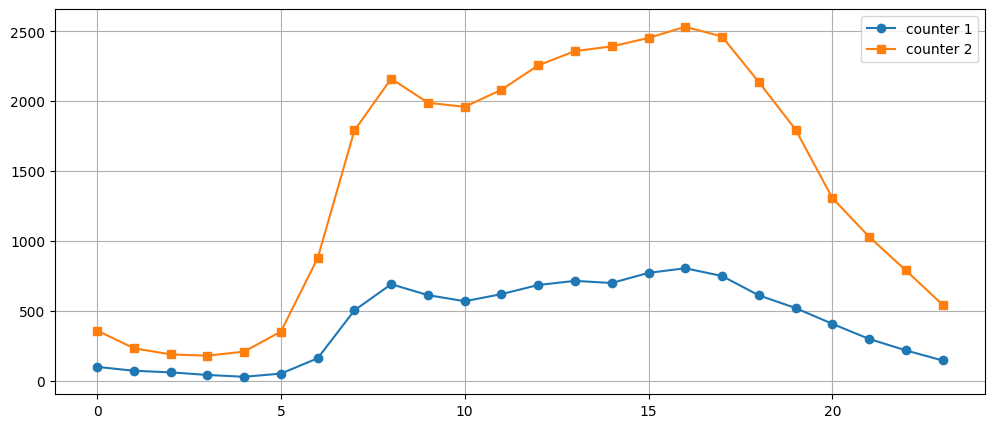

In [108]:
traffic_volume['hour']=pd.to_datetime(traffic_volume['date']).dt.hour
hourly_means=traffic_volume.groupby('hour')[['counter 1','counter 2']].mean()

plt.figure(figsize=(12,5))
plt.plot(hourly_means.index, hourly_means['counter 1'], label='counter 1', marker='o')
plt.plot(hourly_means.index, hourly_means['counter 2'], label='counter 2', marker='s')

plt.legend()
plt.grid(True)

In [109]:
traffic_volume=traffic_volume[
    (pd.to_datetime(traffic_volume['date']) >= '2023-07-27 11:00:00') & 
    (pd.to_datetime(traffic_volume['date']) <= '2024-06-30 23:00:00')
]

# traffic_volume[pd.to_datetime(traffic_volume['date'])>='2023-07-27 11:00:00']. I want to put one more condition in this that date should be less that equal 2024-06-30 23:00:00. how do i do it?


In [110]:
traffic_volume.head()
# traffic_volume.tail()


,date,counter 1,counter 2,hour
635,2023-07-27 11:00:00,610.0,2076.0,11
636,2023-07-27 12:00:00,717.0,2274.0,12
637,2023-07-27 13:00:00,704.0,2299.0,13
638,2023-07-27 14:00:00,679.0,2287.0,14
639,2023-07-27 15:00:00,732.0,2298.0,15


In [111]:
df_merged4.head()

,date,rain,temp,wetb,dewpt,vappr,rhum,wdsp,wddir,sun,vis,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,Oliver_Plunkett,hour,day_of_week
0,2023-07-27 11:00:00,0.0,19.3,16.8,15.1,17.1,77.0,6.0,260.0,0.3,50000.0,5.035000,4.151000,NaN,NaN,11,Thursday
1,2023-07-27 12:00:00,0.0,20.7,17.8,15.9,18.1,74.0,6.0,240.0,0.9,50000.0,5.360333,4.458667,NaN,NaN,12,Thursday
2,2023-07-27 13:00:00,0.0,21.3,17.3,14.5,16.5,65.0,6.0,230.0,0.9,50000.0,5.173000,3.627667,NaN,NaN,13,Thursday
3,2023-07-27 14:00:00,0.0,22.4,16.9,12.9,14.8,55.0,8.0,240.0,1.0,50000.0,5.743333,3.740667,NaN,NaN,14,Thursday
4,2023-07-27 15:00:00,0.0,22.3,17.6,14.4,16.4,61.0,7.0,240.0,0.7,50000.0,5.773667,5.035667,NaN,NaN,15,Thursday


In [112]:
traffic_volume.reset_index(drop=True, inplace=True)
traffic_volume.head()

,date,counter 1,counter 2,hour
0,2023-07-27 11:00:00,610.0,2076.0,11
1,2023-07-27 12:00:00,717.0,2274.0,12
2,2023-07-27 13:00:00,704.0,2299.0,13
3,2023-07-27 14:00:00,679.0,2287.0,14
4,2023-07-27 15:00:00,732.0,2298.0,15


In [113]:
# traffic_volume.dropna(inplace=True)
traffic_volume.shape, df_merged4.shape

((8149, 4), (8149, 17))

In [114]:
df_merged4[['NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','Oliver_Plunkett']]

,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,Oliver_Plunkett
0,5.035000,4.151000,NaN,NaN
1,5.360333,4.458667,NaN,NaN
2,5.173000,3.627667,NaN,NaN
3,5.743333,3.740667,NaN,NaN
4,5.773667,5.035667,NaN,NaN
...,...,...,...,...
8144,15.670667,13.420667,19.096000,17.645667
8145,18.303000,15.303667,21.293333,19.991724
8146,18.018667,12.910333,19.275667,19.596000
8147,17.637333,11.412000,17.576333,16.278333


In [115]:
traffic_volume[['NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','NO2_Oliver_Plunkett']]=df_merged4[['NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','Oliver_Plunkett']]

In [116]:
traffic_volume.drop('hour', axis=1, inplace=True)
traffic_volume.head()

,date,counter 1,counter 2,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,NO2_Oliver_Plunkett
0,2023-07-27 11:00:00,610.0,2076.0,5.035000,4.151000,NaN,NaN
1,2023-07-27 12:00:00,717.0,2274.0,5.360333,4.458667,NaN,NaN
2,2023-07-27 13:00:00,704.0,2299.0,5.173000,3.627667,NaN,NaN
3,2023-07-27 14:00:00,679.0,2287.0,5.743333,3.740667,NaN,NaN
4,2023-07-27 15:00:00,732.0,2298.0,5.773667,5.035667,NaN,NaN


In [117]:
traffic_volume.tail()

,date,counter 1,counter 2,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,NO2_Oliver_Plunkett
8144,2024-06-30 19:00:00,467.0,1443.0,15.670667,13.420667,19.096000,17.645667
8145,2024-06-30 20:00:00,331.0,1099.0,18.303000,15.303667,21.293333,19.991724
8146,2024-06-30 21:00:00,246.0,737.0,18.018667,12.910333,19.275667,19.596000
8147,2024-06-30 22:00:00,152.0,576.0,17.637333,11.412000,17.576333,16.278333
8148,2024-06-30 23:00:00,131.0,349.0,NaN,7.827000,NaN,NaN


In [118]:
traffic_volume.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_93056\3296236052.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  traffic_volume.corr()


,counter 1,counter 2,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,NO2_Oliver_Plunkett
counter 1,1.000000,0.979701,0.146881,0.106268,0.038695,0.015193
counter 2,0.979701,1.000000,0.143035,0.098549,0.035186,0.007168
NO2_St_Patricks,0.146881,0.143035,1.000000,0.733281,0.813851,0.821666
NO2_Grand_Parade,0.106268,0.098549,0.733281,1.000000,0.766659,0.656412
NO2_Beasley_Street,0.038695,0.035186,0.813851,0.766659,1.000000,0.875916
NO2_Oliver_Plunkett,0.015193,0.007168,0.821666,0.656412,0.875916,1.000000


In [119]:
traffic_volume['Average volume']=(traffic_volume['counter 1'] + traffic_volume['counter 2'])/2

In [124]:
traffic_volume.head()

,date,counter 1,counter 2,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,NO2_Oliver_Plunkett,Average volume
0,2023-07-27 11:00:00,610.0,2076.0,5.035000,4.151000,NaN,NaN,1343.0
1,2023-07-27 12:00:00,717.0,2274.0,5.360333,4.458667,NaN,NaN,1495.5
2,2023-07-27 13:00:00,704.0,2299.0,5.173000,3.627667,NaN,NaN,1501.5
3,2023-07-27 14:00:00,679.0,2287.0,5.743333,3.740667,NaN,NaN,1483.0
4,2023-07-27 15:00:00,732.0,2298.0,5.773667,5.035667,NaN,NaN,1515.0


In [125]:
traffic_volume.tail()

,date,counter 1,counter 2,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,NO2_Oliver_Plunkett,Average volume
8144,2024-06-30 19:00:00,467.0,1443.0,15.670667,13.420667,19.096000,17.645667,955.0
8145,2024-06-30 20:00:00,331.0,1099.0,18.303000,15.303667,21.293333,19.991724,715.0
8146,2024-06-30 21:00:00,246.0,737.0,18.018667,12.910333,19.275667,19.596000,491.5
8147,2024-06-30 22:00:00,152.0,576.0,17.637333,11.412000,17.576333,16.278333,364.0
8148,2024-06-30 23:00:00,131.0,349.0,NaN,7.827000,NaN,NaN,240.0


In [123]:
no2_data=traffic_volume[['date','NO2_St_Patricks', 'NO2_Grand_Parade', 'NO2_Beasley_Street','NO2_Oliver_Plunkett']]
no2_data.to_csv('./mydata/NO2_combined.csv')

In [121]:
traffic_volume.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_93056\3296236052.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  traffic_volume.corr()


,counter 1,counter 2,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,NO2_Oliver_Plunkett,Average volume
counter 1,1.000000,0.979701,0.146881,0.106268,0.038695,0.015193,0.988334
counter 2,0.979701,1.000000,0.143035,0.098549,0.035186,0.007168,0.998803
NO2_St_Patricks,0.146881,0.143035,1.000000,0.733281,0.813851,0.821666,0.144371
NO2_Grand_Parade,0.106268,0.098549,0.733281,1.000000,0.766659,0.656412,0.100549
NO2_Beasley_Street,0.038695,0.035186,0.813851,0.766659,1.000000,0.875916,0.036087
NO2_Oliver_Plunkett,0.015193,0.007168,0.821666,0.656412,0.875916,1.000000,0.009127
Average volume,0.988334,0.998803,0.144371,0.100549,0.036087,0.009127,1.000000


In [95]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()
# traffic_volume.dropna(inplace=True)
traffic_volume[['counter 1','counter 2','NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','NO2_Oliver_Plunkett','Average volume']]=scl.fit_transform(traffic_volume[['counter 1','counter 2','NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','NO2_Oliver_Plunkett','Average volume']])

In [100]:
traffic_volume.head()

,date,counter 1,counter 2,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,NO2_Oliver_Plunkett,Average volume
0,2023-07-27 11:00:00,0.540301,0.640012,0.019819,0.025014,NaN,NaN,0.624002
1,2023-07-27 12:00:00,0.635075,0.701142,0.026212,0.030516,NaN,NaN,0.695632
2,2023-07-27 13:00:00,0.623561,0.708861,0.022531,0.015654,NaN,NaN,0.698450
3,2023-07-27 14:00:00,0.601417,0.705156,0.033737,0.017675,NaN,NaN,0.689760
4,2023-07-27 15:00:00,0.648361,0.708552,0.034333,0.040835,NaN,NaN,0.704791


In [97]:
summer_months=traffic_volume[(pd.to_datetime(traffic_volume['date']).dt.month>=3) & (pd.to_datetime(traffic_volume['date']).dt.month<=8)]
winter_months=traffic_volume[(pd.to_datetime(traffic_volume['date']).dt.month>=9) | (pd.to_datetime(traffic_volume['date']).dt.month<=2)]

summer_mean=summer_months.groupby(pd.to_datetime(summer_months['date']).dt.hour)[['NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','NO2_Oliver_Plunkett','Average volume']].mean()
winter_mean=winter_months.groupby(pd.to_datetime(winter_months['date']).dt.hour)[['NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','NO2_Oliver_Plunkett','Average volume']].mean()

In [98]:
summer_mean.head()

,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,NO2_Oliver_Plunkett,Average volume
date,,,,,
0,0.250992,0.162937,0.286089,0.308058,0.103852
1,0.222328,0.140916,0.264548,0.286433,0.065063
2,0.205089,0.126342,0.250147,0.273039,0.050338
3,0.179630,0.095054,0.235655,0.254157,0.044831
4,0.168974,0.073618,0.231277,0.244871,0.050016


In [99]:
winter_mean.head()

,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,NO2_Oliver_Plunkett,Average volume
date,,,,,
0,0.220607,0.131697,0.256481,0.283577,0.097390
1,0.196721,0.109821,0.233672,0.264169,0.064604
2,0.179637,0.108368,0.224905,0.253947,0.053245
3,0.162072,0.081090,0.214267,0.240528,0.044390
4,0.149870,0.063080,0.215667,0.234628,0.046897


Text(0.5, 1.0, 'Winter Months')

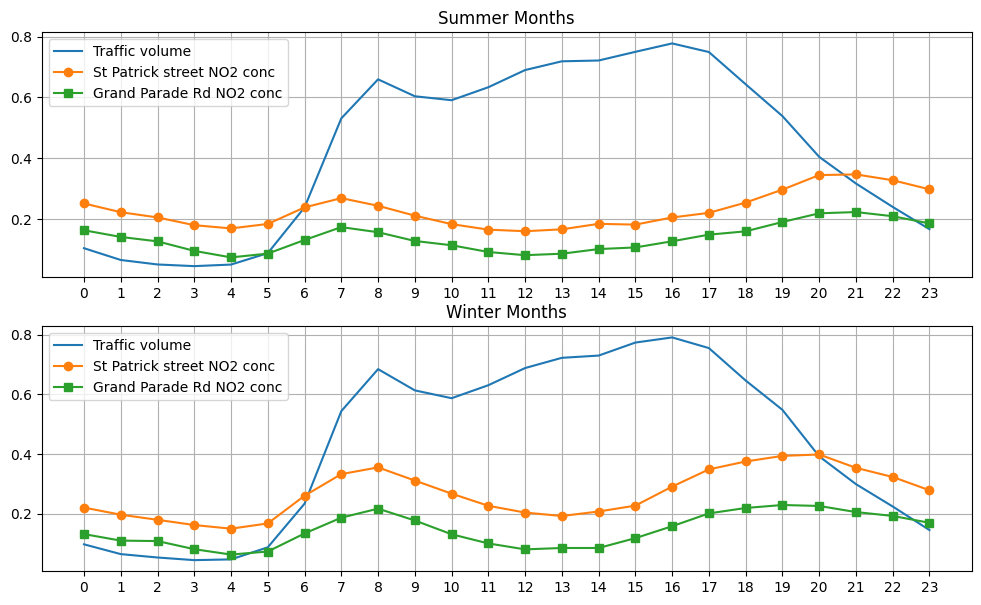

In [462]:
# summer_mean['hour']=pd.to_datetime(summer_months['date']).dt.hour
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(summer_mean.index, summer_mean['Average volume'], label='Traffic volume')
plt.plot(summer_mean.index, summer_mean['NO2_St_Patricks'], marker='o', label='St Patrick street NO2 conc')
plt.plot(summer_mean.index, summer_mean['NO2_Grand_Parade'], marker='s', label='Grand Parade Rd NO2 conc')
xticks=summer_mean.index[::1]
plt.xticks(xticks)
plt.legend()
plt.grid(True)
plt.title('Summer Months')

plt.subplot(2,1,2)
plt.plot(winter_mean.index, winter_mean['Average volume'], label='Traffic volume')
plt.plot(winter_mean.index, winter_mean['NO2_St_Patricks'], marker='o', label='St Patrick street NO2 conc')
plt.plot(winter_mean.index, winter_mean['NO2_Grand_Parade'], marker='s', label='Grand Parade Rd NO2 conc')
xticks=winter_mean.index[::1]
plt.xticks(xticks)
plt.legend()
plt.grid(True)
plt.title('Winter Months')

In [465]:
traffic_volume[['counter 1','counter 2','NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','NO2_Oliver_Plunkett','Average volume']]=scl.inverse_transform(traffic_volume[['counter 1','counter 2','NO2_St_Patricks','NO2_Grand_Parade','NO2_Beasley_Street','NO2_Oliver_Plunkett','Average volume']])

In [466]:
traffic_volume.head()

,date,counter 1,counter 2,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,NO2_Oliver_Plunkett,Average volume
0,2023-07-27 11:00:00,610.0,2076.0,5.035000,4.151000,NaN,NaN,1343.0
1,2023-07-27 12:00:00,717.0,2274.0,5.360333,4.458667,NaN,NaN,1495.5
2,2023-07-27 13:00:00,704.0,2299.0,5.173000,3.627667,NaN,NaN,1501.5
3,2023-07-27 14:00:00,679.0,2287.0,5.743333,3.740667,NaN,NaN,1483.0
4,2023-07-27 15:00:00,732.0,2298.0,5.773667,5.035667,NaN,NaN,1515.0


In [ ]:
df_merged4['traffic volume']=traffic_volume['Average volume']
df_merged4.head()CORRRE

,date,rain,temp,wetb,dewpt,vappr,rhum,wdsp,wddir,sun,vis,NO2_St_Patricks,NO2_Grand_Parade,NO2_Beasley_Street,Oliver_Plunkett,hour,day_of_week,traffic volume
0,2023-07-27 11:00:00,0.0,19.3,16.8,15.1,17.1,77.0,6.0,260.0,0.3,50000.0,5.035000,4.151000,NaN,NaN,11,Thursday,1343.0
1,2023-07-27 12:00:00,0.0,20.7,17.8,15.9,18.1,74.0,6.0,240.0,0.9,50000.0,5.360333,4.458667,NaN,NaN,12,Thursday,1495.5
2,2023-07-27 13:00:00,0.0,21.3,17.3,14.5,16.5,65.0,6.0,230.0,0.9,50000.0,5.173000,3.627667,NaN,NaN,13,Thursday,1501.5
3,2023-07-27 14:00:00,0.0,22.4,16.9,12.9,14.8,55.0,8.0,240.0,1.0,50000.0,5.743333,3.740667,NaN,NaN,14,Thursday,1483.0
4,2023-07-27 15:00:00,0.0,22.3,17.6,14.4,16.4,61.0,7.0,240.0,0.7,50000.0,5.773667,5.035667,NaN,NaN,15,Thursday,1515.0
